In [1]:
#Bibliotecas
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pickle
#import hdbscan
from scipy.signal import butter, sosfiltfilt, find_peaks

#from utiles import spike_reducer

In [2]:
def SpikeDetector(time_series, alpha, th_method = 1, distance=1):
    th = 0
    if th_method == 1:
        ## Standard deviation calculus
        th = alpha * np.std(time_series)
    elif th_method == 2:
        abs_time_series = np.abs(time_series)/0.6745
        th = 4 * np.median(abs_time_series)
    else:
        print("Ingresa una opción válida")
    if th != 0:  
        peaks, _ = find_peaks(-1*time_series, height = th, distance=1)
        
        trimmed_peaks_matrix = np.zeros((peaks.shape[0], 31))
        delete_elec = []
        for i in range(len(peaks)):
            cut = time_series[peaks[i]-10: peaks[i]+21]
            try:
                trimmed_peaks_matrix[i] = cut
            except ValueError:# esta al final o inicio y no tiene 31 valores 
                print("Value Error: {}".format(peaks[i]))
                delete_elec.append(i)
        
        for elec in delete_elec:
            np.delete(peaks, elec)
        
        print("Se obtuvieron {} spikes.".format(len(peaks)))

        return trimmed_peaks_matrix, peaks, th;

In [3]:
mea_elec = {
    'F7'  : 1,  'F6'  : 31, 'G6'  : 61, 'G7'  : 91,
    'F8'  : 2,  'E6'  : 32, 'G5'  : 62, 'H7'  : 92,
    'F12' : 3,  'A6'  : 33, 'G1'  : 63, 'M7'  : 93,
    'F11' : 4,  'B6'  : 34, 'G2'  : 64, 'L7'  : 94,
    'F10' : 5,  'C6'  : 35, 'G3'  : 65, 'K7'  : 95,
    'F9'  : 6,  'D6'  : 36, 'G4'  : 66, 'J7'  : 96,
    'E12' : 7,  'A5'  : 37, 'H1'  : 67, 'M8'  : 97,
    'E11' : 8,  'B5'  : 38, 'H2'  : 68, 'L8'  : 98,
    'E10' : 9,  'C5'  : 39, 'H3'  : 69, 'K8'  : 99,
    'E9'  : 10, 'D5'  : 40, 'H4'  : 70, 'J8'  : 100,
    'D12' : 11, 'A4'  : 41, 'J1'  : 71, 'M9'  : 101,
    'D11' : 12, 'B4'  : 42, 'J2'  : 72, 'L9'  : 102,
    'D10' : 13, 'C4'  : 43, 'J3'  : 73, 'K9'  : 103,
    'D9'  : 14, 'D4'  : 44, 'J4'  : 74, 'J9'  : 104,
    'C11' : 15, 'B3'  : 45, 'K2'  : 75, 'L10' : 105,
    'C10' : 16, 'C3'  : 46, 'K3'  : 76, 'K10' : 106,
    'B10' : 17, 'C2'  : 47, 'L3'  : 77, 'K11' : 107,
    'E8'  : 18, 'E5'  : 48, 'H5'  : 78, 'H8'  : 108,
    'C9'  : 19, 'D3'  : 49, 'K4'  : 79, 'J10' : 109,
    'B9'  : 20, 'D2'  : 50, 'L4'  : 80, 'J11' : 110,
    'A9'  : 21, 'D1'  : 51, 'M4'  : 81, 'J12' : 111,
    'D8'  : 22, 'E4'  : 52, 'J5'  : 82, 'H9'  : 112,
    'C8'  : 23, 'E3'  : 53, 'K5'  : 83, 'H10' : 113,
    'B8'  : 24, 'E2'  : 54, 'L5'  : 84, 'H11' : 114,
    'A8'  : 25, 'E1'  : 55, 'M5'  : 85, 'H12' : 115,
    'D7'  : 26, 'F4'  : 56, 'J6'  : 86, 'G9'  : 116,
    'C7'  : 27, 'F3'  : 57, 'K6'  : 87, 'G10' : 117,
    'B7'  : 28, 'F2'  : 58, 'L6'  : 88, 'G11' : 118,
    'A7'  : 29, 'F1'  : 59, 'M6'  : 89, 'G12' : 119,
    'E7'  : 30, 'F5'  : 60, 'H6'  : 90, 'G8'  : 120,
}

In [4]:
keys_elec = list(mea_elec.keys())

neighboors_dict = {}
neighboors = []

for i in range(len(keys_elec)):
    s = 1
    if keys_elec[i][0] == 'H':
        s = 2

    R = "".join((chr(ord(keys_elec[i][0])+s), str(int(keys_elec[i][1:]))))
    if not(R in keys_elec):
        R = 'X'
    
    U = "".join((keys_elec[i][0], str(int(keys_elec[i][1:]) - 1)))
    if not(U in keys_elec):
        U = 'X'
        
    RU = "".join((chr(ord(keys_elec[i][0])+s), str(int(keys_elec[i][1:]) - 1)))
    if not(RU in keys_elec):
        RU = 'X'
    
    RD = "".join((chr(ord(keys_elec[i][0])+s), str(int(keys_elec[i][1:]) + 1)))
    if not(RD in keys_elec):
        RD = 'X'
    
    
    s = 1
    if keys_elec[i][0] == 'J':
        s = 2
        
    L = "".join((chr(ord(keys_elec[i][0])-s), str(int(keys_elec[i][1:]))))
    if not(L in keys_elec):
        L = 'X'

    D = "".join((keys_elec[i][0], str(int(keys_elec[i][1:]) + 1)))
    if not(D in keys_elec):
        D = 'X'
    
    LU = "".join((chr(ord(keys_elec[i][0])-s), str(int(keys_elec[i][1:]) - 1)))
    if not(LU in keys_elec):
        LU = 'X'
    
    LD = "".join((chr(ord(keys_elec[i][0])-s), str(int(keys_elec[i][1:]) + 1)))
    if not(LD in keys_elec):
        LD = 'X'
    
    neighboors_dict[keys_elec[i]] = [R, RU, U, LU, L, LD, D, RD]

In [5]:
mea_elec.keys()

dict_keys(['F7', 'F6', 'G6', 'G7', 'F8', 'E6', 'G5', 'H7', 'F12', 'A6', 'G1', 'M7', 'F11', 'B6', 'G2', 'L7', 'F10', 'C6', 'G3', 'K7', 'F9', 'D6', 'G4', 'J7', 'E12', 'A5', 'H1', 'M8', 'E11', 'B5', 'H2', 'L8', 'E10', 'C5', 'H3', 'K8', 'E9', 'D5', 'H4', 'J8', 'D12', 'A4', 'J1', 'M9', 'D11', 'B4', 'J2', 'L9', 'D10', 'C4', 'J3', 'K9', 'D9', 'D4', 'J4', 'J9', 'C11', 'B3', 'K2', 'L10', 'C10', 'C3', 'K3', 'K10', 'B10', 'C2', 'L3', 'K11', 'E8', 'E5', 'H5', 'H8', 'C9', 'D3', 'K4', 'J10', 'B9', 'D2', 'L4', 'J11', 'A9', 'D1', 'M4', 'J12', 'D8', 'E4', 'J5', 'H9', 'C8', 'E3', 'K5', 'H10', 'B8', 'E2', 'L5', 'H11', 'A8', 'E1', 'M5', 'H12', 'D7', 'F4', 'J6', 'G9', 'C7', 'F3', 'K6', 'G10', 'B7', 'F2', 'L6', 'G11', 'A7', 'F1', 'M6', 'G12', 'E7', 'F5', 'H6', 'G8'])

In [6]:
# C H A R G E   F I L E
path_file = "C:\\Users\\Verruckt\\Desktop\\Lab Neurociencia\\ChR2SOMA20230622s02A_RAWfilt.h5"

#file['Data']['Recording_0']['AnalogStream']['Stream_0']['ChannelData']
#file['Data']['Recording_0']['AnalogStream']['Stream_0']['ChannelDataTimeStamps']
#file['Data']['Recording_0']['AnalogStream']['Stream_0']['InfoChannel']
file = h5py.File(path_file)

index_elec = {}
info_channel = file['Data']['Recording_0']['AnalogStream']['Stream_0']['InfoChannel']
name_channel = ''
for i in range(0, len(info_channel)):
    name_channel = info_channel[i][4].decode('UTF-8')
    index_elec[name_channel] = i

In [7]:
index_elec

{'F7': 0,
 'F8': 1,
 'F12': 2,
 'F11': 3,
 'F10': 4,
 'F9': 5,
 'E12': 6,
 'E11': 7,
 'E10': 8,
 'E9': 9,
 'D12': 10,
 'D11': 11,
 'D10': 12,
 'D9': 13,
 'C11': 14,
 'C10': 15,
 'B10': 16,
 'E8': 17,
 'C9': 18,
 'B9': 19,
 'A9': 20,
 'D8': 21,
 'C8': 22,
 'B8': 23,
 'A8': 24,
 'D7': 25,
 'C7': 26,
 'B7': 27,
 'A7': 28,
 'E7': 29,
 'F6': 30,
 'E6': 31,
 'A6': 32,
 'B6': 33,
 'C6': 34,
 'D6': 35,
 'A5': 36,
 'B5': 37,
 'C5': 38,
 'D5': 39,
 'A4': 40,
 'B4': 41,
 'C4': 42,
 'D4': 43,
 'B3': 44,
 'C3': 45,
 'C2': 46,
 'E5': 47,
 'D3': 48,
 'D2': 49,
 'D1': 50,
 'E4': 51,
 'E3': 52,
 'E2': 53,
 'E1': 54,
 'F4': 55,
 'F3': 56,
 'F2': 57,
 'F1': 58,
 'F5': 59,
 'G6': 60,
 'G5': 61,
 'G1': 62,
 'G2': 63,
 'G3': 64,
 'G4': 65,
 'H1': 66,
 'H2': 67,
 'H3': 68,
 'H4': 69,
 'J1': 70,
 'J2': 71,
 'J3': 72,
 'J4': 73,
 'K2': 74,
 'K3': 75,
 'L3': 76,
 'H5': 77,
 'K4': 78,
 'L4': 79,
 'M4': 80,
 'J5': 81,
 'K5': 82,
 'L5': 83,
 'M5': 84,
 'J6': 85,
 'K6': 86,
 'L6': 87,
 'M6': 88,
 'H6': 89,
 'G7': 9

In [8]:
'''  'C4', 'C5', 'C6', 'C7', 'D5', 'E6', 'E9', 'L6', 'L8'  '''

#electrode selection
#list_elec = ['C5', 'L6']
# all electrodes
list_elec = list(index_elec.keys())
#print(list_elec)



dict_elec = {}
for electrode in list_elec:
    print("{} e:{}".format(electrode, mea_elec[electrode]))
    raw_signal = np.array(file['Data']['Recording_0']['AnalogStream']['Stream_0']['ChannelData'][index_elec[electrode]])

    ## Filtering the raw signal
    sos = butter(4, [400, 3500], 'bp', output='sos', fs = 10000)
    time_series = sosfiltfilt(sos, raw_signal)

    segments, peaks, std_th = SpikeDetector(time_series, alpha= 5, th_method = 2, distance=1)
    #segments, peaks, std_th = SpikeDetector(raw_signal, alpha= 5, th_method = 2, distance=1)
    dict_elec[electrode]={'segments' : segments, 
                          'ts':peaks, 
                          'clusters' : np.zeros(segments.shape[0]),
                          'umap' : np.zeros(segments.shape[0])}

F7 e:1
Se obtuvieron 531 spikes.
F8 e:2
Se obtuvieron 3487 spikes.
F12 e:3
Se obtuvieron 219 spikes.
F11 e:4
Se obtuvieron 381 spikes.
F10 e:5
Se obtuvieron 561 spikes.
F9 e:6
Se obtuvieron 537 spikes.
E12 e:7
Se obtuvieron 388 spikes.
E11 e:8
Se obtuvieron 630 spikes.
E10 e:9
Se obtuvieron 775 spikes.
E9 e:10
Se obtuvieron 921 spikes.
D12 e:11
Se obtuvieron 340 spikes.
D11 e:12
Se obtuvieron 375 spikes.
D10 e:13
Se obtuvieron 472 spikes.
D9 e:14
Se obtuvieron 423 spikes.
C11 e:15
Se obtuvieron 250 spikes.
C10 e:16
Se obtuvieron 224 spikes.
B10 e:17
Se obtuvieron 458 spikes.
E8 e:18
Se obtuvieron 629 spikes.
C9 e:19
Se obtuvieron 772 spikes.
B9 e:20
Se obtuvieron 922 spikes.
A9 e:21
Se obtuvieron 402 spikes.
D8 e:22
Se obtuvieron 421 spikes.
C8 e:23
Se obtuvieron 511 spikes.
B8 e:24
Se obtuvieron 750 spikes.
A8 e:25
Se obtuvieron 408 spikes.
D7 e:26
Se obtuvieron 2474 spikes.
C7 e:27
Se obtuvieron 3395 spikes.
B7 e:28
Se obtuvieron 704 spikes.
A7 e:29
Se obtuvieron 807 spikes.
E7 e:30


In [9]:
from collections import Counter

counter = Counter()

aux_concat = []
for electrode in list_elec:
    aux_concat = np.concatenate([aux_concat, dict_elec[electrode]['ts']])

counter = Counter(aux_concat)

In [10]:
dict_elec[R]['segments'][repeated_R][5:11]

NameError: name 'repeated_R' is not defined

In [11]:
C = central_elec = 'L6'
repeated = int(counter.most_common()[0][0])

colors = ['black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black']

R, RU, U, LU, L, LD, D, RD = neighboors_dict[central_elec]

amps = np.zeros(9,)

repeated_C = int(np.where(dict_elec[C]['ts'] == repeated)[0][0])
repeated_R = int(np.where(dict_elec[R]['ts'] == repeated)[0][0])
R_corr = np.corrcoef(dict_elec[C]['segments'][repeated_C], dict_elec[R]['segments'][repeated_R])[0,1]
amps[0] = np.max(dict_elec[R]['segments'][repeated_R][5:10]) - dict_elec[R]['segments'][repeated_R][11]

repeated_C = int(np.where(dict_elec[C]['ts'] == repeated)[0][0])
repeated_RU = int(np.where(dict_elec[RU]['ts'] == repeated)[0][0])
RU_corr = np.corrcoef(dict_elec[C]['segments'][repeated_C], dict_elec[RU]['segments'][repeated_RU])[0,1]
amps[1] = np.max(dict_elec[RU]['segments'][repeated_RU][5:10]) - dict_elec[RU]['segments'][repeated_RU][11]

repeated_C = int(np.where(dict_elec[C]['ts'] == repeated)[0][0])
repeated_U = int(np.where(dict_elec[U]['ts'] == repeated)[0][0])
U_corr = np.corrcoef(dict_elec[C]['segments'][repeated_C], dict_elec[U]['segments'][repeated_U])[0,1]
amps[2] = np.max(dict_elec[U]['segments'][repeated_U][5:10]) - dict_elec[U]['segments'][repeated_U][11]

repeated_C = int(np.where(dict_elec[C]['ts'] == repeated)[0][0])
repeated_LU = int(np.where(dict_elec[LU]['ts'] == repeated)[0][0])
LU_corr = np.corrcoef(dict_elec[C]['segments'][repeated_C], dict_elec[LU]['segments'][repeated_LU])[0,1]
amps[3] = np.max(dict_elec[LU]['segments'][repeated_LU][5:10]) - dict_elec[LU]['segments'][repeated_LU][11]

repeated_C = int(np.where(dict_elec[C]['ts'] == repeated)[0][0])
repeated_L = int(np.where(dict_elec[L]['ts'] == repeated)[0][0])
L_corr = np.corrcoef(dict_elec[C]['segments'][repeated_C], dict_elec[L]['segments'][repeated_L])[0,1]
amps[4] = np.max(dict_elec[L]['segments'][repeated_L][5:10]) - dict_elec[L]['segments'][repeated_L][11]

repeated_C = int(np.where(dict_elec[C]['ts'] == repeated)[0][0])
repeated_LD = int(np.where(dict_elec[LD]['ts'] == repeated)[0][0])
LD_corr = np.corrcoef(dict_elec[C]['segments'][repeated_C], dict_elec[LD]['segments'][repeated_LD])[0,1]
amps[5] = np.max(dict_elec[LD]['segments'][repeated_LD][5:10]) - dict_elec[LD]['segments'][repeated_LD][11]

repeated_C = int(np.where(dict_elec[C]['ts'] == repeated)[0][0])
repeated_D = int(np.where(dict_elec[D]['ts'] == repeated)[0][0])
D_corr = np.corrcoef(dict_elec[C]['segments'][repeated_C], dict_elec[D]['segments'][repeated_D])[0,1]
amps[6] = np.max(dict_elec[D]['segments'][repeated_D][5:10]) - dict_elec[D]['segments'][repeated_D][11]

repeated_C = int(np.where(dict_elec[C]['ts'] == repeated)[0][0])
repeated_RD = int(np.where(dict_elec[RD]['ts'] == repeated)[0][0])
RD_corr = np.corrcoef(dict_elec[C]['segments'][repeated_C], dict_elec[RD]['segments'][repeated_RD])[0,1]
amps[7] = np.max(dict_elec[RD]['segments'][repeated_RD][5:10]) - dict_elec[RD]['segments'][repeated_RD][11]

amps[8] = np.max(dict_elec[C]['segments'][repeated_C][5:10]) - dict_elec[C]['segments'][repeated_C][11]

colors[np.where(amps == np.max(amps))[0][0]] = 'green'

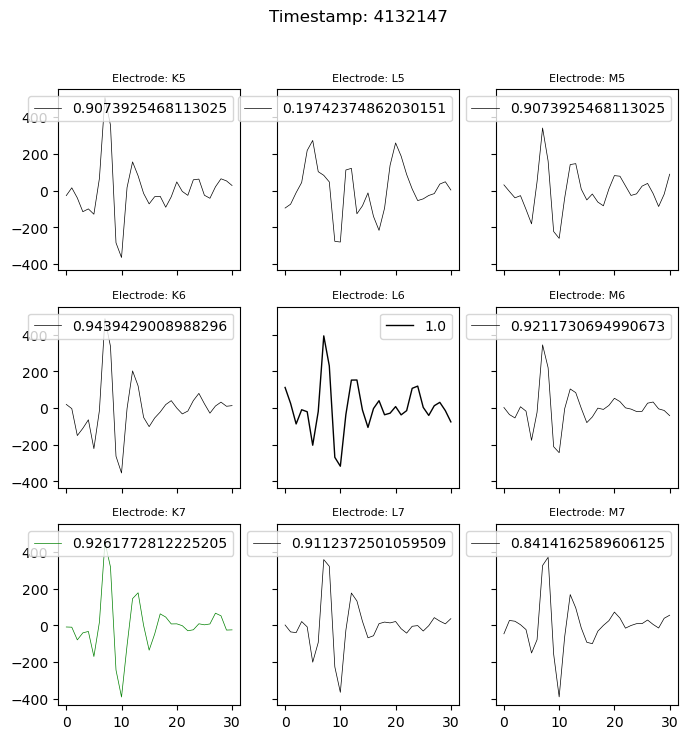

In [12]:
fig, axs = plt.subplots(3, 3, sharey=True, sharex=True, figsize=(8, 8))
plt.suptitle("Timestamp: {}".format(repeated))


## Gráfica superior izquierda
axs[0, 0].set_title("Electrode: {}".format(LU), fontsize = 8)
axs[0, 0].plot(dict_elec[LU]['segments'][repeated_LU], color = colors[3], lw=0.5, label = LU_corr)
axs[0, 0].legend()

## Gráfica superior 
axs[0, 1].set_title("Electrode: {}".format(U), fontsize = 8)
axs[0, 1].plot(dict_elec[U]['segments'][repeated_U], color = colors[2], lw=0.5, label = U_corr)
axs[0, 1].legend()

## Gráfica superior derecha
axs[0, 2].set_title("Electrode: {}".format(RU), fontsize = 8)
axs[0, 2].plot(dict_elec[RU]['segments'][repeated_RU], color = colors[1], lw=0.5, label = LU_corr)
axs[0, 2].legend()

## Gráfica izquierda
axs[1, 0].set_title("Electrode: {}".format(L), fontsize = 8)
axs[1, 0].plot(dict_elec[L]['segments'][repeated_L], color = colors[4], lw=0.5, label = L_corr)
axs[1, 0].legend()

## Gráfica central
axs[1, 1].set_title("Electrode: {}".format(C), fontsize = 8)
axs[1, 1].plot(dict_elec[C]['segments'][repeated_C], color = colors[8], lw=1, label = '1.0')
axs[1, 1].legend()

## Gráfica derecha
axs[1, 2].set_title("Electrode: {}".format(R), fontsize = 8)
axs[1, 2].plot(dict_elec[R]['segments'][repeated_R], color = colors[0], lw=0.5, label = R_corr)
axs[1, 2].legend()

## Gráfica inferior izquierda
axs[2, 0].set_title("Electrode: {}".format(LD), fontsize = 8)
axs[2, 0].plot(dict_elec[LD]['segments'][repeated_LD], color = colors[5], lw=0.5, label = LD_corr)
axs[2, 0].legend()

## Gráfica inferior
axs[2, 1].set_title("Electrode: {}".format(D), fontsize = 8)
axs[2, 1].plot(dict_elec[D]['segments'][repeated_D], color = colors[6], lw=0.5, label = D_corr)
axs[2, 1].legend()

## Gráfica superior izquierda
axs[2, 2].set_title("Electrode: {}".format(RD), fontsize = 8)
axs[2, 2].plot(dict_elec[RD]['segments'][repeated_RD], color = colors[7], lw=0.5, label = RD_corr)
axs[2, 2].legend()

plt.show()

In [17]:
# Definir la matriz original
matriz_original = [
    ["A1", "B1", "C1", "D1", "E1", "F1", "G1", "H1", "I1", "J1", "K1", "L1", "M1"],
    ["A2", "B2", "C2", "D2", "E2", "F2", "G2", "H2", "I2", "J2", "K2", "L2", "M2"],
    ["A3", "B3", "C3", "D3", "E3", "F3", "G3", "H3", "I3", "J3", "K3", "L3", "M3"],
    ["A4", "B4", "C4", "D4", "E4", "F4", "G4", "H4", "I4", "J4", "K4", "L4", "M4"],
    ["A5", "B5", "C5", "D5", "E5", "F5", "G5", "H5", "I5", "J5", "K5", "L5", "M5"],
    ["A6", "B6", "C6", "D6", "E6", "F6", "G6", "H6", "I6", "J6", "K6", "L6", "M6"],
    ["A7", "B7", "C7", "D7", "E7", "F7", "G7", "H7", "I7", "J7", "K7", "L7", "M7"],
    ["A8", "B8", "C8", "D8", "E8", "F8", "G8", "H8", "I8", "J8", "K8", "L8", "M8"],
    ["A9", "B9", "C9", "D9", "E9", "F9", "G9", "H9", "I9", "J9", "K9", "L9", "M9"],
    ["A10", "B10", "C10", "D10", "E10", "F10", "G10", "H10", "I10", "J10", "K10", "L10", "M10"],
    ["A11", "B11", "C11", "D11", "E11", "F11", "G11", "H11", "I11", "J11", "K11", "L11", "M11"],
    ["A12", "B12", "C12", "D12", "E12", "F12", "G12", "H12", "I12", "J12", "K12", "L12", "M12"]
]

# Definir dimensiones de la matriz original
filas = len(matriz_original)
columnas = len(matriz_original[0])

# Tamaño de las submatrices 3x3
tamano_submatriz = 3

# Extraer las muestras 3x3
muestras_3x3 = []

for i in range(filas - tamano_submatriz + 1):
    for j in range(columnas - tamano_submatriz + 1):
        muestra = [fila[j:j+tamano_submatriz] for fila in matriz_original[i:i+tamano_submatriz]]
        muestras_3x3.append(muestra)

# Convertir las submatrices a listas
muestras_3x3 = [[[elemento for elemento in fila] for fila in submatriz] for submatriz in muestras_3x3]

# Definir la lista de elementos a eliminar
elementos_a_eliminar = ["A1", "A2", "A3", "A10", "A11", "A12",
                         "B1", "B2", "B11", "B12",
                         "C1", "C12",
                         "K1", "K12",
                         "L1", "L2", "L11", "L12",
                         "M1", "M2", "M3", "M10", "M11", "M12"]

# Diccionario para almacenar las asociaciones electrodo - marca de tiempo
diccionario_asociaciones = {}

# Filtrar las muestras 3x3 y guardarlas en el diccionario
for idx, muestra in enumerate(muestras_3x3, 1):
    muestra_filtrada = [list(filter(lambda x: x not in elementos_a_eliminar, fila)) for fila in muestra]
    diccionario_asociaciones[f'Submatriz {idx}'] = muestra_filtrada

# Imprimir el diccionario de asociaciones
for submatriz, valores in diccionario_asociaciones.items():
    print(f'{submatriz}:')
    for fila in valores:
        print(fila)
    print()

# Crear un archivo .h5
with h5py.File('resultados.h5', 'w') as hf:
    for nombre_electrodo in nombres_electrodos:
        hf.create_dataset(nombre_electrodo, data=dict_elec[nombre_electrodo]['segments'])

# Guardar cada resultado de cada electrodo en archivos de Excel
for nombre_electrodo in nombres_electrodos:
    for i, segmento in enumerate(dict_elec[nombre_electrodo]['segments']):
        df = pd.DataFrame(segmento)
        nombre_archivo = f'resultados_{nombre_electrodo}_{i}.xlsx'
        df.to_excel(nombre_archivo, index=False)


Submatriz 1:
[]
['C2']
['B3', 'C3']

Submatriz 2:
['D1']
['C2', 'D2']
['B3', 'C3', 'D3']

Submatriz 3:
['D1', 'E1']
['C2', 'D2', 'E2']
['C3', 'D3', 'E3']

Submatriz 4:
['D1', 'E1', 'F1']
['D2', 'E2', 'F2']
['D3', 'E3', 'F3']

Submatriz 5:
['E1', 'F1', 'G1']
['E2', 'F2', 'G2']
['E3', 'F3', 'G3']

Submatriz 6:
['F1', 'G1', 'H1']
['F2', 'G2', 'H2']
['F3', 'G3', 'H3']

Submatriz 7:
['G1', 'H1', 'I1']
['G2', 'H2', 'I2']
['G3', 'H3', 'I3']

Submatriz 8:
['H1', 'I1', 'J1']
['H2', 'I2', 'J2']
['H3', 'I3', 'J3']

Submatriz 9:
['I1', 'J1']
['I2', 'J2', 'K2']
['I3', 'J3', 'K3']

Submatriz 10:
['J1']
['J2', 'K2']
['J3', 'K3', 'L3']

Submatriz 11:
[]
['K2']
['K3', 'L3']

Submatriz 12:
['C2']
['B3', 'C3']
['A4', 'B4', 'C4']

Submatriz 13:
['C2', 'D2']
['B3', 'C3', 'D3']
['B4', 'C4', 'D4']

Submatriz 14:
['C2', 'D2', 'E2']
['C3', 'D3', 'E3']
['C4', 'D4', 'E4']

Submatriz 15:
['D2', 'E2', 'F2']
['D3', 'E3', 'F3']
['D4', 'E4', 'F4']

Submatriz 16:
['E2', 'F2', 'G2']
['E3', 'F3', 'G3']
['E4', 'F4', 'G4'

In [18]:


# Definir la matriz original
matriz_original = [
    ["A1", "B1", "C1", "D1", "E1", "F1", "G1", "H1", "I1", "J1", "K1", "L1", "M1"],
    ["A2", "B2", "C2", "D2", "E2", "F2", "G2", "H2", "I2", "J2", "K2", "L2", "M2"],
    ["A3", "B3", "C3", "D3", "E3", "F3", "G3", "H3", "I3", "J3", "K3", "L3", "M3"],
    ["A4", "B4", "C4", "D4", "E4", "F4", "G4", "H4", "I4", "J4", "K4", "L4", "M4"],
    ["A5", "B5", "C5", "D5", "E5", "F5", "G5", "H5", "I5", "J5", "K5", "L5", "M5"],
    ["A6", "B6", "C6", "D6", "E6", "F6", "G6", "H6", "I6", "J6", "K6", "L6", "M6"],
    ["A7", "B7", "C7", "D7", "E7", "F7", "G7", "H7", "I7", "J7", "K7", "L7", "M7"],
    ["A8", "B8", "C8", "D8", "E8", "F8", "G8", "H8", "I8", "J8", "K8", "L8", "M8"],
    ["A9", "B9", "C9", "D9", "E9", "F9", "G9", "H9", "I9", "J9", "K9", "L9", "M9"],
    ["A10", "B10", "C10", "D10", "E10", "F10", "G10", "H10", "I10", "J10", "K10", "L10", "M10"],
    ["A11", "B11", "C11", "D11", "E11", "F11", "G11", "H11", "I11", "J11", "K11", "L11", "M11"],
    ["A12", "B12", "C12", "D12", "E12", "F12", "G12", "H12", "I12", "J12", "K12", "L12", "M12"]
]

# Definir dimensiones de la matriz original
filas = len(matriz_original)
columnas = len(matriz_original[0])

# Tamaño de las submatrices 3x3
tamano_submatriz = 3

# Extraer las muestras 3x3
muestras_3x3 = []

for i in range(filas - tamano_submatriz + 1):
    for j in range(columnas - tamano_submatriz + 1):
        muestra = [fila[j:j+tamano_submatriz] for fila in matriz_original[i:i+tamano_submatriz]]
        muestras_3x3.append(muestra)

# Convertir las submatrices a listas
muestras_3x3 = [[[elemento for elemento in fila] for fila in submatriz] for submatriz in muestras_3x3]

# Definir la lista de elementos a eliminar
elementos_a_eliminar = ["A1", "A2", "A3", "A10", "A11", "A12",
                         "B1", "B2", "B11", "B12",
                         "C1", "C12",
                         "K1", "K12",
                         "L1", "L2", "L11", "L12",
                         "M1", "M2", "M3", "M10", "M11", "M12"]

# Lista para almacenar las matrices filtradas
matrices_filtradas = []

# Filtrar las muestras 3x3 y guardarlas en la lista
for muestra in muestras_3x3:
    muestra_filtrada = [list(filter(lambda x: x not in elementos_a_eliminar, fila)) for fila in muestra]
    matrices_filtradas.append(muestra_filtrada)

# Imprimir las matrices filtradas en formato de listas
for idx, matriz in enumerate(matrices_filtradas, 1):
    print(f'Submatriz {idx}:')
    for fila in matriz:
        print(fila)
    print()


Submatriz 1:
[]
['C2']
['B3', 'C3']

Submatriz 2:
['D1']
['C2', 'D2']
['B3', 'C3', 'D3']

Submatriz 3:
['D1', 'E1']
['C2', 'D2', 'E2']
['C3', 'D3', 'E3']

Submatriz 4:
['D1', 'E1', 'F1']
['D2', 'E2', 'F2']
['D3', 'E3', 'F3']

Submatriz 5:
['E1', 'F1', 'G1']
['E2', 'F2', 'G2']
['E3', 'F3', 'G3']

Submatriz 6:
['F1', 'G1', 'H1']
['F2', 'G2', 'H2']
['F3', 'G3', 'H3']

Submatriz 7:
['G1', 'H1', 'I1']
['G2', 'H2', 'I2']
['G3', 'H3', 'I3']

Submatriz 8:
['H1', 'I1', 'J1']
['H2', 'I2', 'J2']
['H3', 'I3', 'J3']

Submatriz 9:
['I1', 'J1']
['I2', 'J2', 'K2']
['I3', 'J3', 'K3']

Submatriz 10:
['J1']
['J2', 'K2']
['J3', 'K3', 'L3']

Submatriz 11:
[]
['K2']
['K3', 'L3']

Submatriz 12:
['C2']
['B3', 'C3']
['A4', 'B4', 'C4']

Submatriz 13:
['C2', 'D2']
['B3', 'C3', 'D3']
['B4', 'C4', 'D4']

Submatriz 14:
['C2', 'D2', 'E2']
['C3', 'D3', 'E3']
['C4', 'D4', 'E4']

Submatriz 15:
['D2', 'E2', 'F2']
['D3', 'E3', 'F3']
['D4', 'E4', 'F4']

Submatriz 16:
['E2', 'F2', 'G2']
['E3', 'F3', 'G3']
['E4', 'F4', 'G4'

9 electrones 

In [19]:
print(dict_elec.keys())


dict_keys(['F7', 'F8', 'F12', 'F11', 'F10', 'F9', 'E12', 'E11', 'E10', 'E9', 'D12', 'D11', 'D10', 'D9', 'C11', 'C10', 'B10', 'E8', 'C9', 'B9', 'A9', 'D8', 'C8', 'B8', 'A8', 'D7', 'C7', 'B7', 'A7', 'E7', 'F6', 'E6', 'A6', 'B6', 'C6', 'D6', 'A5', 'B5', 'C5', 'D5', 'A4', 'B4', 'C4', 'D4', 'B3', 'C3', 'C2', 'E5', 'D3', 'D2', 'D1', 'E4', 'E3', 'E2', 'E1', 'F4', 'F3', 'F2', 'F1', 'F5', 'G6', 'G5', 'G1', 'G2', 'G3', 'G4', 'H1', 'H2', 'H3', 'H4', 'J1', 'J2', 'J3', 'J4', 'K2', 'K3', 'L3', 'H5', 'K4', 'L4', 'M4', 'J5', 'K5', 'L5', 'M5', 'J6', 'K6', 'L6', 'M6', 'H6', 'G7', 'H7', 'M7', 'L7', 'K7', 'J7', 'M8', 'L8', 'K8', 'J8', 'M9', 'L9', 'K9', 'J9', 'L10', 'K10', 'K11', 'H8', 'J10', 'J11', 'J12', 'H9', 'H10', 'H11', 'H12', 'G9', 'G10', 'G11', 'G12', 'G8'])


In [60]:
import numpy as np
import random
from itertools import combinations
from scipy.stats import pearsonr
import h5py
import pandas as pd


# Función para realizar la eliminación y contar segmentos eliminados
def eliminar_segmentos(electrodos):
    
    nombres_electrodos = electrodos

    
    # Inicializar una variable para almacenar las marcas de tiempo idénticas
    marcas_identicas = None

    # Obtener las marcas de tiempo idénticas entre los electrodos
    for nombre_electrodo in nombres_electrodos:
        marcas_de_tiempo_electrodo = dict_elec[nombre_electrodo]['ts']
        if marcas_identicas is None:
            marcas_identicas = marcas_de_tiempo_electrodo
        else:
            marcas_identicas = np.intersect1d(marcas_identicas, marcas_de_tiempo_electrodo)

    # Crear un diccionario para almacenar los índices correspondientes a las marcas de tiempo para cada electrodo
    indices_electrodo = {}

    # Obtener los índices correspondientes a las marcas de tiempo idénticas para cada electrodo
    for nombre_electrodo in nombres_electrodos:
        marcas_de_tiempo_electrodo = dict_elec[nombre_electrodo]['ts']
        indices_electrodo[nombre_electrodo] = [np.where(marcas_de_tiempo_electrodo == marca)[0][0] for marca in marcas_identicas]

    # Crear un diccionario para almacenar los segmentos correspondientes a las marcas de tiempo para cada electrodo
    segmentos_por_electrodo = {}

    # Obtener los segmentos correspondientes a las marcas de tiempo idénticas para cada electrodo
    for nombre_electrodo in nombres_electrodos:
        segmentos_por_electrodo[nombre_electrodo] = dict_elec[nombre_electrodo]['segments'][indices_electrodo[nombre_electrodo]]

        
        
        
    # Diccionario para almacenar los segmentos y amplitudes con mayor correlación por electrodo
    segmentos_con_mayor_amplitud = {nombre: [] for nombre in nombres_electrodos}

    # Diccionario para almacenar los índices de segmentos a eliminar por electrodo
    indices_a_eliminar = {nombre: [] for nombre in nombres_electrodos}

    # Diccionario para contar segmentos similares y distintos por electrodo
    segmentos_similares = {nombre: 0 for nombre in nombres_electrodos}
    segmentos_distintos = {nombre: 0 for nombre in nombres_electrodos}

    # Diccionario para contar el número de iteraciones por número de electrodos seleccionados
    iteraciones_por_numero_electrodos = {}

    # Diccionario para almacenar las combinaciones utilizadas por número de electrodos seleccionados
    combinaciones_utilizadas = {}

    # Función para realizar la eliminación y contar segmentos eliminados
    def eliminar_segmentos(electrodos, dict_elec):
        # Comparar los segmentos y calcular la correlación para cada par de electrodos
        for i, nombre_electrodo_1 in enumerate(electrodos):
            for j, nombre_electrodo_2 in enumerate(electrodos):
                if i >= j:
                    continue

                # Obtener los segmentos que corresponden a las marcas de tiempo idénticas
                segmentos_electrodo_1 = dict_elec[nombre_electrodo_1]['segments'][indices_electrodo[nombre_electrodo_1]]
                segmentos_electrodo_2 = dict_elec[nombre_electrodo_2]['segments'][indices_electrodo[nombre_electrodo_2]]

                # Comparar los segmentos y calcular la correlación
                for k, (seg_electrodo_1, seg_electrodo_2) in enumerate(zip(segmentos_electrodo_1, segmentos_electrodo_2)):
                    correlacion, _ = pearsonr(seg_electrodo_1, seg_electrodo_2)

                    if correlacion >= 0.7:
                        # Comparar amplitudes y guardar el segmento con mayor amplitud
                        amplitud_electrodo_1 = np.max(seg_electrodo_1) - np.min(seg_electrodo_1)
                        amplitud_electrodo_2 = np.max(seg_electrodo_2) - np.min(seg_electrodo_2)

                        if amplitud_electrodo_1 > amplitud_electrodo_2:
                            segmentos_con_mayor_amplitud[nombre_electrodo_1].append((seg_electrodo_1, amplitud_electrodo_1))
                            indices_a_eliminar[nombre_electrodo_2].append(i)  # Agregar el índice para eliminar en electrodo_2
                        else:
                            segmentos_con_mayor_amplitud[nombre_electrodo_2].append((seg_electrodo_2, amplitud_electrodo_2))
                            indices_a_eliminar[nombre_electrodo_1].append(i)  # Agregar el índice para eliminar en electrodo_1

                        segmentos_similares[nombre_electrodo_1] += 1
                        segmentos_similares[nombre_electrodo_2] += 1
                    else:
                        segmentos_distintos[nombre_electrodo_1] += 1
                        segmentos_distintos[nombre_electrodo_2] += 1

    # Eliminar los segmentos con menor amplitud utilizando np.delete() por electrodo
    for nombre_electrodo in nombres_electrodos:
        indices_a_eliminar[nombre_electrodo] = list(set(indices_a_eliminar[nombre_electrodo]))  # Eliminar duplicados
        dict_elec[nombre_electrodo]['segments'] = np.delete(dict_elec[nombre_electrodo]['segments'], indices_a_eliminar[nombre_electrodo], axis=0)

    # Realizar combinaciones para cada número de electrodos seleccionados
    for num_electrodos_seleccionados in range(3, 10):
        # Reiniciar contadores para este número de electrodos
        segmentos_con_mayor_amplitud = {nombre: [] for nombre in nombres_electrodos}
        indices_a_eliminar = {nombre: [] for nombre in nombres_electrodos}
        segmentos_similares = {nombre: 0 for nombre in nombres_electrodos}
        segmentos_distintos = {nombre: 0 for nombre in nombres_electrodos}

        # Generar todas las combinaciones posibles de electrodos
        combinaciones_electrodos = list(combinations(nombres_electrodos, num_electrodos_seleccionados))

        # Mezclar aleatoriamente las combinaciones
        random.shuffle(combinaciones_electrodos)

        # Almacenar las combinaciones utilizadas
        combinaciones_utilizadas[num_electrodos_seleccionados] = combinaciones_electrodos

        # Iterar sobre las combinaciones
        for combinacion in combinaciones_electrodos:
            #print("\nCombinación de electrodos:", combinacion)
            eliminar_segmentos(combinacion, dict_elec)
            for nombre in nombres_electrodos:
                longitud_original = len(dict_elec[nombre]['segments']) + len(indices_a_eliminar[nombre])
                #print("\nLongitud original en {}:".format(nombre), longitud_original)
                #print("Total de segmentos similares en {}:".format(nombre), segmentos_similares[nombre])
                #print("Total de segmentos distintos en {}:".format(nombre), segmentos_distintos[nombre])
                #print("Total de segmentos eliminados en {}:".format(nombre), len(indices_a_eliminar[nombre]))
                #print("Longitud después de la eliminación en {}:".format(nombre), len(dict_elec[nombre]['segments']))

        # Contar el número total de iteraciones para este número de electrodos seleccionados
        iteraciones_por_numero_electrodos[num_electrodos_seleccionados] = len(combinaciones_electrodos)

    # Imprimir las combinaciones utilizadas
    #print("\nCombinaciones utilizadas por número de electrodos seleccionados:")
    for num_electrodos, combinaciones in combinaciones_utilizadas.items():
        #print("{} electrodos:".format(num_electrodos))
        for combinacion in combinaciones:
            print(combinacion)
        print()

    # Imprimir el número total de iteraciones por número de electrodos seleccionados
    print("\nNúmero total de iteraciones por número de electrodos seleccionados:")
    for num_electrodos, iteraciones in iteraciones_por_numero_electrodos.items():
        print("{} electrodos: {}".format(num_electrodos, iteraciones))



In [61]:
import numpy as np
import random
from itertools import combinations
from scipy.stats import pearsonr

# Definir la matriz original
matriz_original = [
    ["A1", "B1", "C1", "D1", "E1", "F1", "G1", "H1", "J1", "K1", "L1", "M1"],
    ["A2", "B2", "C2", "D2", "E2", "F2", "G2", "H2", "J2", "K2", "L2", "M2"],
    ["A3", "B3", "C3", "D3", "E3", "F3", "G3", "H3", "J3", "K3", "L3", "M3"],
    ["A4", "B4", "C4", "D4", "E4", "F4", "G4", "H4", "J4", "K4", "L4", "M4"],
    ["A5", "B5", "C5", "D5", "E5", "F5", "G5", "H5", "J5", "K5", "L5", "M5"],
    ["A6", "B6", "C6", "D6", "E6", "F6", "G6", "H6", "J6", "K6", "L6", "M6"],
    ["A7", "B7", "C7", "D7", "E7", "F7", "G7", "H7", "J7", "K7", "L7", "M7"],
    ["A8", "B8", "C8", "D8", "E8", "F8", "G8", "H8", "J8", "K8", "L8", "M8"],
    ["A9", "B9", "C9", "D9", "E9", "F9", "G9", "H9", "J9", "K9", "L9", "M9"],
    ["A10", "B10", "C10", "D10", "E10", "F10", "G10", "H10", "J10", "K10", "L10", "M10"],
    ["A11", "B11", "C11", "D11", "E11", "F11", "G11", "H11", "J11", "K11", "L11", "M11"],
    ["A12", "B12", "C12", "D12", "E12", "F12", "G12", "H12", "J12", "K12", "L12", "M12"]
]

# Definir dimensiones de la matriz original
filas = len(matriz_original)
columnas = len(matriz_original[0])

# Tamaño de las submatrices 3x3
tamano_submatriz = 3

# Extraer las muestras 3x3
muestras_3x3 = []

for i in range(filas - tamano_submatriz + 1):
    for j in range(columnas - tamano_submatriz + 1):
        muestra = [fila[j:j+tamano_submatriz] for fila in matriz_original[i:i+tamano_submatriz]]
        muestras_3x3.append(muestra)

# Convertir las submatrices a listas
muestras_3x3 = [[[elemento for elemento in fila] for fila in submatriz] for submatriz in muestras_3x3]

# Definir la lista de elementos a eliminar
elementos_a_eliminar = ["A1", "A2", "A3", "A10", "A11", "A12",
                         "B1", "B2", "B11", "B12",
                         "C1", "C12",
                         "K1", "K12",
                         "L1", "L2", "L11", "L12",
                         "M1", "M2", "M3", "M10", "M11", "M12"]

# Lista para almacenar las matrices filtradas
matrices_filtradas = []

# Filtrar las muestras 3x3 y guardarlas en la lista
for muestra in muestras_3x3:
    muestra_filtrada = [list(filter(lambda x: x not in elementos_a_eliminar, fila)) for fila in muestra]
    matrices_filtradas.append(muestra_filtrada)

# Imprimir las matrices filtradas en formato de listas
for idx, matriz in enumerate(matrices_filtradas, 1):
    print(f'Submatriz {idx}:')
    for fila in matriz:
        print(fila)
    print()
    
    
   
# Iterar sobre las matrices filtradas
for idx, submatriz in enumerate(matrices_filtradas, 1):
    print()
    print(f'Submatriz {idx}:')

    # Lista para almacenar los electrones presentes en esta submatriz
    electrones_submatriz = []

    # Obtener los electrones presentes en esta submatriz
    for fila in submatriz:
        for elemento in fila:
            if elemento != "":
                electrones_submatriz.append(elemento)
                
    # Llamar a la función eliminar_segmentos con la lista de electrodos en la submatriz actual
    eliminar_segmentos(electrones_submatriz)

   








Submatriz 1:
[]
['C2']
['B3', 'C3']

Submatriz 2:
['D1']
['C2', 'D2']
['B3', 'C3', 'D3']

Submatriz 3:
['D1', 'E1']
['C2', 'D2', 'E2']
['C3', 'D3', 'E3']

Submatriz 4:
['D1', 'E1', 'F1']
['D2', 'E2', 'F2']
['D3', 'E3', 'F3']

Submatriz 5:
['E1', 'F1', 'G1']
['E2', 'F2', 'G2']
['E3', 'F3', 'G3']

Submatriz 6:
['F1', 'G1', 'H1']
['F2', 'G2', 'H2']
['F3', 'G3', 'H3']

Submatriz 7:
['G1', 'H1', 'J1']
['G2', 'H2', 'J2']
['G3', 'H3', 'J3']

Submatriz 8:
['H1', 'J1']
['H2', 'J2', 'K2']
['H3', 'J3', 'K3']

Submatriz 9:
['J1']
['J2', 'K2']
['J3', 'K3', 'L3']

Submatriz 10:
[]
['K2']
['K3', 'L3']

Submatriz 11:
['C2']
['B3', 'C3']
['A4', 'B4', 'C4']

Submatriz 12:
['C2', 'D2']
['B3', 'C3', 'D3']
['B4', 'C4', 'D4']

Submatriz 13:
['C2', 'D2', 'E2']
['C3', 'D3', 'E3']
['C4', 'D4', 'E4']

Submatriz 14:
['D2', 'E2', 'F2']
['D3', 'E3', 'F3']
['D4', 'E4', 'F4']

Submatriz 15:
['E2', 'F2', 'G2']
['E3', 'F3', 'G3']
['E4', 'F4', 'G4']

Submatriz 16:
['F2', 'G2', 'H2']
['F3', 'G3', 'H3']
['F4', 'G4', 'H4'

('C2', 'E2', 'E3')
('E1', 'C2', 'E3')
('D2', 'E2', 'E3')
('D1', 'C2', 'D3')
('E1', 'C3', 'D3')
('D1', 'C2', 'E3')
('D1', 'D2', 'C3')
('D1', 'C3', 'E3')
('E1', 'E2', 'C3')
('E1', 'E2', 'D3')
('D1', 'C2', 'C3')
('D1', 'C3', 'D3')
('D1', 'E2', 'D3')
('E1', 'C2', 'D3')
('D2', 'C3', 'D3')
('D2', 'D3', 'E3')
('C2', 'D2', 'D3')
('D1', 'E1', 'D3')
('C2', 'D2', 'E2')
('D1', 'C2', 'E2')
('E2', 'D3', 'E3')
('E1', 'D3', 'E3')
('C2', 'E2', 'D3')
('E2', 'C3', 'E3')
('C2', 'C3', 'D3')
('C2', 'D3', 'E3')
('E2', 'C3', 'D3')
('D1', 'D2', 'D3')
('D1', 'D2', 'E3')
('D1', 'E1', 'E3')
('E1', 'E2', 'E3')
('D1', 'E1', 'C3')
('C2', 'C3', 'E3')
('C3', 'D3', 'E3')
('E1', 'D2', 'E3')
('E1', 'C2', 'C3')
('D1', 'E1', 'E2')
('E1', 'C2', 'D2')
('E1', 'D2', 'E2')
('D1', 'E2', 'C3')
('D1', 'E1', 'D2')
('E1', 'D2', 'C3')
('D2', 'E2', 'D3')
('D1', 'D3', 'E3')
('D1', 'C2', 'D2')
('E1', 'C2', 'E2')
('D2', 'E2', 'C3')
('E1', 'D2', 'D3')
('D1', 'E1', 'C2')
('D2', 'C3', 'E3')
('E1', 'C3', 'E3')
('C2', 'D2', 'E3')
('C2', 'E2',

('F2', 'E3', 'G3')
('E2', 'G2', 'G3')
('F1', 'F2', 'G3')
('E1', 'E2', 'F2')
('E2', 'F2', 'F3')
('F1', 'G2', 'G3')
('E2', 'F3', 'G3')
('G1', 'E2', 'G3')
('G2', 'F3', 'G3')
('E1', 'F1', 'F3')
('E2', 'F2', 'G3')
('E2', 'G2', 'F3')
('E3', 'F3', 'G3')
('F1', 'G1', 'G2')
('E1', 'G1', 'F3')
('E1', 'F2', 'G3')
('E1', 'G2', 'G3')
('F1', 'G2', 'F3')
('F2', 'F3', 'G3')
('F2', 'G2', 'F3')
('F1', 'E3', 'G3')
('E1', 'G1', 'G2')
('G2', 'E3', 'F3')
('E1', 'F1', 'G1')
('E1', 'F2', 'F3')
('E1', 'F1', 'E2')
('E1', 'F3', 'G3')
('E1', 'G2', 'E3')
('F1', 'E2', 'G3')
('F1', 'E2', 'G2')
('E2', 'E3', 'G3')
('E2', 'E3', 'F3')
('F2', 'E3', 'F3')
('G1', 'F3', 'G3')
('E1', 'G1', 'E3')
('F1', 'G1', 'F3')
('G1', 'F2', 'E3')
('F2', 'G2', 'G3')
('F1', 'E2', 'F3')
('E1', 'F2', 'E3')
('E1', 'G1', 'G3')
('G1', 'E2', 'E3')
('F1', 'E2', 'E3')
('E2', 'F2', 'G2')
('G1', 'E3', 'G3')
('E1', 'E3', 'G3')
('F1', 'G1', 'E3')
('E1', 'G1', 'F2')
('G1', 'G2', 'G3')
('E1', 'E2', 'F3')
('G1', 'E3', 'F3')
('G2', 'E3', 'G3')
('E1', 'F1',

('H2', 'G3', 'H3')
('G1', 'G2', 'H2')
('G1', 'H1', 'H2')
('G1', 'F2', 'G2')
('F1', 'H1', 'H2')
('G1', 'F2', 'G3')
('G1', 'H1', 'F3')
('H1', 'G2', 'G3')
('G1', 'F3', 'G3')
('F2', 'F3', 'H3')
('H1', 'G2', 'H2')
('G1', 'H2', 'H3')
('G1', 'G2', 'G3')
('F1', 'G1', 'F2')
('F2', 'H2', 'G3')
('F1', 'F2', 'H2')
('G1', 'G2', 'F3')
('F1', 'H2', 'H3')
('F1', 'G2', 'H2')
('F2', 'H2', 'F3')
('F2', 'G3', 'H3')
('G2', 'H2', 'F3')
('H1', 'F3', 'G3')
('G1', 'H1', 'F2')
('G2', 'F3', 'G3')
('H2', 'F3', 'G3')
('H1', 'G3', 'H3')
('F1', 'G1', 'F3')
('H1', 'F2', 'H3')
('F3', 'G3', 'H3')
('H1', 'G2', 'H3')
('G1', 'H1', 'G2')
('F2', 'G2', 'G3')
('F1', 'H2', 'F3')
('G1', 'F3', 'H3')
('H1', 'G2', 'F3')
('F1', 'F2', 'F3')
('F2', 'G2', 'H3')
('F1', 'F2', 'G2')
('F1', 'G1', 'G2')
('G1', 'G3', 'H3')
('G1', 'F2', 'H3')
('H1', 'F2', 'F3')
('F1', 'H1', 'G3')
('F1', 'G3', 'H3')
('F1', 'G1', 'H3')
('F1', 'H2', 'G3')
('F1', 'G2', 'F3')
('F1', 'G2', 'H3')
('G2', 'H2', 'H3')
('F1', 'G1', 'G3')
('H1', 'F3', 'H3')
('F1', 'F2',

('H1', 'H2', 'H3')
('H1', 'G2', 'H2')
('H2', 'J2', 'H3')
('G1', 'J1', 'G2')
('J1', 'G2', 'H3')
('J1', 'H3', 'J3')
('G2', 'H2', 'J3')
('H1', 'G2', 'G3')
('G1', 'J2', 'G3')
('G2', 'H2', 'G3')
('J1', 'J2', 'J3')
('G1', 'G2', 'J3')
('H1', 'J1', 'H3')
('J1', 'G2', 'G3')
('G1', 'J1', 'G3')
('J1', 'H2', 'H3')
('G1', 'H1', 'J2')
('H2', 'J2', 'J3')
('J1', 'G2', 'J2')
('G2', 'H2', 'J2')
('G1', 'G2', 'G3')
('H1', 'H2', 'G3')
('H2', 'J2', 'G3')
('G3', 'H3', 'J3')
('G1', 'H1', 'G2')
('H1', 'J1', 'G2')
('J2', 'G3', 'H3')
('G1', 'H1', 'H3')
('J1', 'G3', 'H3')
('H2', 'G3', 'H3')
('H1', 'G2', 'H3')
('J2', 'H3', 'J3')
('G1', 'G2', 'H3')
('H1', 'G2', 'J2')
('G1', 'H1', 'J1')
('G1', 'H2', 'G3')
('G1', 'G3', 'H3')
('H1', 'J2', 'J3')
('G1', 'H1', 'G3')
('G2', 'J2', 'H3')
('G2', 'J2', 'J3')
('H1', 'J2', 'H3')
('H1', 'J1', 'H2')
('J1', 'H2', 'G3')
('H2', 'H3', 'J3')
('G1', 'J2', 'J3')
('H2', 'G3', 'J3')
('G1', 'H1', 'H2')
('H1', 'J2', 'G3')
('G1', 'J1', 'H3')
('G1', 'J1', 'H2')
('H1', 'J1', 'J2')
('G1', 'J1',

('H2', 'J2', 'K3')
('J2', 'K2', 'J3')
('H1', 'K2', 'H3')
('H1', 'K2', 'K3')
('H3', 'J3', 'K3')
('H1', 'H2', 'J3')
('H2', 'J2', 'H3')
('J1', 'K2', 'K3')
('J1', 'H3', 'J3')
('H2', 'K2', 'J3')
('H1', 'J2', 'K2')
('H1', 'H3', 'K3')
('J2', 'H3', 'J3')
('H1', 'J1', 'K2')
('J1', 'K2', 'J3')
('H1', 'H3', 'J3')
('J1', 'J2', 'K2')
('H1', 'J3', 'K3')
('J1', 'J2', 'H3')
('J1', 'J2', 'J3')
('H1', 'H2', 'K3')
('H1', 'H2', 'H3')
('H1', 'J1', 'J3')
('H1', 'J2', 'J3')
('H1', 'J1', 'H2')
('J1', 'H2', 'J2')
('J1', 'H2', 'K2')
('K2', 'H3', 'J3')
('H2', 'J2', 'J3')
('H2', 'J3', 'K3')
('H1', 'J2', 'K3')
('H1', 'J1', 'J2')
('J1', 'H2', 'H3')
('J2', 'K2', 'H3')
('H2', 'H3', 'K3')
('H1', 'J1', 'H3')
('H2', 'J2', 'K2')
('J2', 'H3', 'K3')
('H2', 'K2', 'H3')
('H1', 'K2', 'J3')
('H1', 'H2', 'J2')
('K2', 'H3', 'K3')
('H2', 'K2', 'K3')
('J1', 'K2', 'H3')
('J1', 'H2', 'K3')
('J1', 'H3', 'K3')
('J2', 'K2', 'K3')
('H2', 'H3', 'J3')
('H1', 'J2', 'H3')
('K2', 'J3', 'K3')
('J2', 'J3', 'K3')
('J1', 'J2', 'K3')
('J1', 'H2',

('C4', 'D4', 'E4')
('C2', 'C3', 'E3')
('C2', 'E2', 'D4')
('C2', 'D3', 'C4')
('C3', 'D3', 'C4')
('E2', 'E3', 'E4')
('D3', 'E3', 'E4')
('C2', 'D2', 'D4')
('C3', 'D4', 'E4')
('C2', 'E2', 'E3')
('D3', 'C4', 'D4')
('D3', 'D4', 'E4')
('D2', 'E2', 'E4')
('D2', 'E3', 'C4')
('C2', 'D3', 'D4')
('C3', 'C4', 'E4')
('E2', 'C3', 'D4')
('E2', 'D4', 'E4')
('E3', 'D4', 'E4')
('C3', 'D3', 'E4')
('C2', 'D2', 'C4')
('C2', 'D3', 'E3')
('D2', 'E2', 'E3')
('E2', 'D3', 'E3')
('C2', 'D2', 'D3')
('E2', 'C3', 'E4')
('E2', 'C4', 'D4')
('D2', 'C4', 'E4')
('C2', 'D2', 'E2')
('C3', 'D3', 'E3')
('C2', 'E3', 'C4')
('D2', 'C3', 'E3')
('E2', 'D3', 'C4')
('D3', 'C4', 'E4')
('D2', 'C3', 'D4')
('D2', 'D3', 'C4')
('C3', 'E3', 'E4')
('C2', 'C3', 'D4')
('C2', 'D4', 'E4')
('C2', 'C3', 'E4')
('D2', 'E2', 'C4')
('C2', 'D2', 'C3')
('C2', 'E2', 'E4')
('C2', 'C3', 'C4')
('C2', 'E2', 'C4')
('E2', 'D3', 'D4')
('D2', 'C3', 'C4')
('D2', 'C3', 'E4')
('C3', 'E3', 'D4')
('C2', 'D2', 'E3')
('D2', 'E2', 'D4')
('C2', 'E3', 'E4')
('D2', 'E2',

('D3', 'E3', 'D4')
('F2', 'D4', 'F4')
('D3', 'D4', 'E4')
('D3', 'E3', 'F4')
('F2', 'E3', 'F3')
('E3', 'F3', 'D4')
('E3', 'D4', 'F4')
('F2', 'D3', 'D4')
('D2', 'D3', 'F3')
('D3', 'E4', 'F4')
('F2', 'D3', 'E3')
('D2', 'F2', 'E4')
('D2', 'E3', 'F3')
('D2', 'E3', 'E4')
('D2', 'D3', 'E3')
('D2', 'E2', 'F3')
('F2', 'D3', 'F3')
('D2', 'E2', 'E3')
('F2', 'E3', 'F4')
('F2', 'E3', 'E4')
('D4', 'E4', 'F4')
('D2', 'D3', 'D4')
('F2', 'E3', 'D4')
('E2', 'F3', 'D4')
('E2', 'E3', 'E4')
('D2', 'F3', 'F4')
('E2', 'F2', 'F3')
('D2', 'D4', 'F4')
('E3', 'E4', 'F4')
('D3', 'F3', 'D4')
('F3', 'D4', 'E4')
('D2', 'D3', 'E4')
('D2', 'E2', 'D3')
('D2', 'E2', 'D4')
('E2', 'F2', 'D3')
('E2', 'F2', 'F4')
('F2', 'E4', 'F4')
('D2', 'E2', 'E4')
('E2', 'D3', 'F3')
('D2', 'E2', 'F2')
('D2', 'F2', 'F4')
('F2', 'F3', 'F4')
('D3', 'F3', 'F4')
('D2', 'F3', 'D4')
('E2', 'D3', 'E3')
('D3', 'D4', 'F4')
('D3', 'F3', 'E4')
('E2', 'F3', 'E4')
('E2', 'F2', 'E3')
('D2', 'D4', 'E4')
('F2', 'D3', 'F4')
('D3', 'E3', 'E4')
('D2', 'E4',

('E2', 'F2', 'G3')
('E2', 'G2', 'F3')
('F2', 'G2', 'F3')
('F2', 'G3', 'E4')
('F3', 'G3', 'E4')
('F2', 'E3', 'F3')
('E2', 'F3', 'F4')
('E4', 'F4', 'G4')
('G2', 'E3', 'G3')
('E3', 'F3', 'G4')
('F2', 'E3', 'F4')
('E2', 'G2', 'F4')
('G2', 'G3', 'G4')
('E2', 'F2', 'F3')
('G2', 'F3', 'E4')
('E3', 'E4', 'G4')
('G2', 'E3', 'G4')
('F3', 'E4', 'F4')
('G2', 'F4', 'G4')
('F2', 'E3', 'G3')
('E2', 'F3', 'G3')
('F2', 'G3', 'G4')
('E2', 'F2', 'F4')
('F2', 'F3', 'F4')
('F3', 'F4', 'G4')
('E2', 'E3', 'G3')
('E2', 'F4', 'G4')
('G2', 'E3', 'E4')
('E3', 'F3', 'F4')
('E2', 'F3', 'G4')
('F3', 'G3', 'G4')
('F2', 'F3', 'G3')
('G2', 'E4', 'G4')
('E3', 'G3', 'G4')
('F2', 'E4', 'G4')
('G2', 'F3', 'G4')
('E2', 'E3', 'E4')
('F2', 'F3', 'E4')
('E3', 'F3', 'E4')
('G2', 'E3', 'F3')
('F2', 'G2', 'E3')
('E3', 'F4', 'G4')
('F2', 'G2', 'G3')
('E2', 'E4', 'G4')
('F3', 'E4', 'G4')
('E2', 'E4', 'F4')
('E3', 'G3', 'E4')
('G3', 'E4', 'F4')
('F2', 'G2', 'F4')
('E2', 'G2', 'E4')
('E2', 'F2', 'G4')
('F2', 'E3', 'E4')
('E2', 'E3',

('G2', 'F3', 'G3')
('F2', 'F4', 'G4')
('G2', 'F4', 'H4')
('G2', 'F3', 'F4')
('G2', 'H2', 'F3')
('F2', 'G3', 'H3')
('G2', 'H2', 'H3')
('F2', 'H2', 'G4')
('F3', 'G3', 'H3')
('G3', 'H3', 'G4')
('F3', 'G3', 'G4')
('F2', 'F3', 'G4')
('F3', 'H3', 'G4')
('G2', 'F4', 'G4')
('G3', 'H3', 'F4')
('H2', 'G3', 'H4')
('G2', 'H2', 'F4')
('F2', 'G2', 'F4')
('F2', 'H2', 'F3')
('F2', 'G2', 'H2')
('G2', 'H2', 'G4')
('H2', 'F3', 'G3')
('G2', 'G3', 'F4')
('G2', 'H3', 'H4')
('F3', 'F4', 'H4')
('F4', 'G4', 'H4')
('G2', 'G3', 'H4')
('G2', 'H3', 'G4')
('G2', 'F3', 'H4')
('H2', 'G3', 'F4')
('H2', 'F4', 'G4')
('H2', 'F3', 'H3')
('F2', 'G2', 'G4')
('G2', 'F3', 'H3')
('F2', 'G3', 'H4')
('H2', 'H3', 'G4')
('F2', 'G3', 'G4')
('F2', 'G2', 'F3')
('H3', 'F4', 'G4')
('F2', 'F3', 'H3')
('F3', 'G3', 'H4')
('H3', 'G4', 'H4')
('F2', 'G4', 'H4')
('F2', 'G3', 'F4')
('F3', 'H3', 'F4')
('H2', 'H3', 'F4')
('F2', 'H2', 'F4')
('H2', 'G3', 'H3')
('F2', 'H2', 'G3')
('F2', 'H2', 'H4')
('G2', 'G4', 'H4')
('H3', 'F4', 'H4')
('G3', 'H3',

('G2', 'G3', 'J3')
('J2', 'G3', 'G4')
('H2', 'H4', 'J4')
('G2', 'H3', 'G4')
('J2', 'G3', 'H4')
('H2', 'G3', 'J4')
('H2', 'J3', 'G4')
('H2', 'J2', 'J4')
('G3', 'J3', 'H4')
('G2', 'G4', 'J4')
('J2', 'J3', 'J4')
('J3', 'G4', 'H4')
('G2', 'J2', 'H3')
('J2', 'G3', 'J4')
('G3', 'G4', 'H4')
('G2', 'H2', 'H3')
('H2', 'J3', 'H4')
('H3', 'H4', 'J4')
('H3', 'J3', 'G4')
('G2', 'J2', 'J4')
('G2', 'H3', 'H4')
('G2', 'H2', 'J2')
('H3', 'G4', 'H4')
('G2', 'J3', 'J4')
('G2', 'J2', 'J3')
('G2', 'H2', 'J4')
('H2', 'J2', 'H4')
('G3', 'G4', 'J4')
('H2', 'G4', 'H4')
('G3', 'J3', 'G4')
('J2', 'G4', 'H4')
('G3', 'J3', 'J4')
('G4', 'H4', 'J4')
('G2', 'J2', 'G3')
('J2', 'H3', 'J3')
('H3', 'G4', 'J4')
('G2', 'H2', 'G4')
('J2', 'G3', 'H3')
('G2', 'J2', 'G4')
('H2', 'J3', 'J4')
('H2', 'G3', 'H3')
('G2', 'H2', 'J3')
('G2', 'G3', 'J4')
('H3', 'J3', 'J4')
('G2', 'G3', 'H4')
('J2', 'J3', 'G4')
('J3', 'G4', 'J4')
('H3', 'J3', 'H4')
('H2', 'H3', 'J3')
('H2', 'H3', 'G4')
('J3', 'H4', 'J4')
('G2', 'G4', 'H4')
('H2', 'J2',

('J2', 'J3', 'K3')
('H2', 'H3', 'K3')
('J3', 'K3', 'J4')
('J3', 'H4', 'J4')
('K3', 'H4', 'K4')
('K2', 'J3', 'J4')
('H2', 'J2', 'H3')
('J2', 'K3', 'H4')
('H2', 'J3', 'K4')
('J2', 'H3', 'K3')
('J2', 'H4', 'K4')
('K2', 'H3', 'H4')
('H2', 'H3', 'H4')
('K2', 'H4', 'J4')
('H3', 'H4', 'K4')
('K2', 'J3', 'K3')
('K2', 'H3', 'J4')
('J2', 'K3', 'J4')
('H3', 'H4', 'J4')
('H2', 'J3', 'H4')
('J2', 'J4', 'K4')
('H2', 'J2', 'K2')
('K2', 'J3', 'H4')
('K2', 'K3', 'H4')
('H2', 'J2', 'K4')
('H2', 'K2', 'K4')
('J2', 'J3', 'J4')
('H3', 'J3', 'K3')
('J2', 'H3', 'H4')
('J2', 'H4', 'J4')
('J3', 'K3', 'H4')
('H3', 'K3', 'K4')
('K3', 'H4', 'J4')
('H2', 'K2', 'H4')
('K2', 'J3', 'K4')
('H2', 'K2', 'J4')
('H2', 'K2', 'H3')
('J3', 'J4', 'K4')
('H2', 'H4', 'J4')
('H3', 'J3', 'K4')
('H4', 'J4', 'K4')
('H3', 'K3', 'H4')
('H2', 'J3', 'J4')
('K2', 'K3', 'J4')
('H2', 'K2', 'K3')
('H2', 'J2', 'K3')
('J2', 'K2', 'H3')
('H3', 'J3', 'H4')
('H3', 'K3', 'J4')
('H2', 'K2', 'J3')
('J2', 'K2', 'J3')
('K2', 'H3', 'J3')
('J2', 'H3',

('K2', 'K4', 'L4')
('J2', 'K2', 'L3')
('K2', 'J3', 'K4')
('J2', 'J4', 'K4')
('J2', 'J3', 'L4')
('L3', 'J4', 'K4')
('K2', 'J3', 'L3')
('J2', 'J3', 'J4')
('K2', 'J3', 'J4')
('K2', 'L3', 'K4')
('J2', 'K4', 'L4')
('J2', 'L3', 'K4')
('J2', 'K2', 'J4')
('K3', 'L3', 'L4')
('J2', 'J3', 'K4')
('J3', 'L3', 'J4')
('K3', 'K4', 'L4')
('K2', 'K3', 'L3')
('J2', 'K3', 'J4')
('K2', 'K3', 'K4')
('J2', 'J4', 'L4')
('K2', 'J4', 'L4')
('K3', 'J4', 'K4')
('J3', 'K4', 'L4')
('J3', 'K3', 'L3')
('K2', 'K3', 'J4')
('K3', 'L3', 'K4')
('J2', 'K2', 'K4')
('J2', 'J3', 'K3')
('K2', 'K3', 'L4')
('K2', 'J3', 'L4')
('J3', 'L3', 'K4')
('J2', 'K2', 'L4')
('J2', 'L3', 'J4')
('L3', 'K4', 'L4')
('J3', 'J4', 'L4')
('J3', 'K3', 'K4')
('J3', 'L3', 'L4')
('K2', 'L3', 'L4')
('J2', 'K3', 'L3')
('J2', 'J3', 'L3')
('J2', 'K3', 'K4')
('J2', 'K2', 'K3')
('L3', 'J4', 'L4')
('K2', 'J3', 'K3')
('K2', 'L3', 'J4')
('J2', 'K2', 'J3')
('K3', 'L3', 'J4')
('J2', 'L3', 'L4')
('K3', 'J4', 'L4')
('J3', 'J4', 'K4')
('J3', 'K3', 'J4')
('J3', 'K3',

('C3', 'D3', 'D4')
('E3', 'C4', 'C5')
('D3', 'E4', 'E5')
('C3', 'D4', 'C5')
('D3', 'E3', 'E5')
('C3', 'E3', 'E4')
('E4', 'C5', 'E5')
('C4', 'E4', 'D5')
('D3', 'C4', 'E5')
('D4', 'C5', 'D5')
('C3', 'D3', 'E3')
('C3', 'D3', 'C5')
('C3', 'E4', 'C5')
('C3', 'D3', 'D5')
('C4', 'E4', 'E5')
('D4', 'C5', 'E5')
('C3', 'D5', 'E5')
('C4', 'D4', 'E5')
('D3', 'C4', 'C5')
('E3', 'C4', 'E5')
('D3', 'D5', 'E5')
('C3', 'C4', 'C5')
('C3', 'E3', 'D5')
('C3', 'D3', 'E4')
('D4', 'D5', 'E5')
('E3', 'C4', 'D4')
('E3', 'D5', 'E5')
('E3', 'E4', 'E5')
('C3', 'E3', 'C4')
('C3', 'D4', 'E4')
('C4', 'D4', 'D5')
('D3', 'E4', 'D5')
('D4', 'E4', 'D5')
('C3', 'C4', 'E4')
('C3', 'C5', 'E5')
('D3', 'D4', 'C5')
('C4', 'C5', 'E5')
('D3', 'C5', 'D5')
('D4', 'E4', 'C5')
('E4', 'C5', 'D5')
('D3', 'E3', 'D5')
('E3', 'E4', 'C5')
('D3', 'C5', 'E5')
('C4', 'D4', 'E4')
('C3', 'E3', 'D4')
('C3', 'D4', 'D5')
('C3', 'D3', 'E5')
('C4', 'E4', 'C5')
('C4', 'C5', 'D5')
('E3', 'C5', 'D5')
('D3', 'C4', 'D5')
('E4', 'D5', 'E5')
('C3', 'E4',

('D3', 'D5', 'F5')
('D3', 'D4', 'E4')
('D4', 'F4', 'D5')
('E3', 'F4', 'F5')
('E3', 'D5', 'E5')
('F4', 'D5', 'E5')
('D3', 'E4', 'E5')
('F3', 'D4', 'F5')
('E3', 'F3', 'F4')
('D3', 'D4', 'D5')
('F3', 'E5', 'F5')
('D4', 'D5', 'F5')
('E3', 'D4', 'E5')
('D3', 'D4', 'F5')
('F4', 'E5', 'F5')
('E3', 'F3', 'D5')
('D3', 'D5', 'E5')
('D3', 'E3', 'F4')
('F3', 'D4', 'F4')
('D4', 'F4', 'E5')
('D4', 'E5', 'F5')
('D3', 'D4', 'F4')
('E4', 'D5', 'F5')
('D3', 'E4', 'F4')
('F3', 'E4', 'F4')
('D3', 'F4', 'E5')
('D3', 'E3', 'F3')
('F3', 'D4', 'D5')
('D3', 'E3', 'E5')
('E3', 'E4', 'F4')
('E3', 'F3', 'E5')
('D3', 'E3', 'F5')
('E3', 'E4', 'E5')
('E3', 'D5', 'F5')
('D5', 'E5', 'F5')
('E4', 'E5', 'F5')
('D3', 'E3', 'D4')
('F3', 'F4', 'F5')
('E3', 'F4', 'D5')
('E4', 'F4', 'F5')
('D3', 'D4', 'E5')
('E3', 'D4', 'F4')
('F4', 'D5', 'F5')
('E3', 'F3', 'D4')
('D3', 'E3', 'E4')
('D3', 'E4', 'F5')
('F3', 'E4', 'F5')
('F3', 'F4', 'E5')
('E3', 'F3', 'F5')
('D4', 'E4', 'D5')
('D3', 'F4', 'F5')
('E3', 'D4', 'D5')
('D3', 'F4',

('G4', 'E5', 'F5')
('E3', 'F4', 'G4')
('F3', 'G3', 'G5')
('F4', 'F5', 'G5')
('F4', 'G4', 'E5')
('F3', 'E4', 'E5')
('F3', 'E4', 'F5')
('F3', 'F4', 'E5')
('G3', 'E4', 'F5')
('E3', 'F4', 'E5')
('G4', 'F5', 'G5')
('E3', 'G4', 'G5')
('F3', 'F4', 'G4')
('G3', 'F4', 'F5')
('E3', 'F3', 'F5')
('G3', 'G4', 'F5')
('E4', 'G4', 'F5')
('F3', 'E4', 'F4')
('E3', 'F4', 'G5')
('E3', 'E4', 'F5')
('E3', 'G3', 'E5')
('F3', 'E4', 'G4')
('E3', 'F3', 'E4')
('E3', 'F3', 'E5')
('F3', 'G3', 'F4')
('E4', 'F4', 'G5')
('G3', 'E4', 'G4')
('F3', 'F5', 'G5')
('E4', 'F4', 'F5')
('E3', 'G3', 'F4')
('E4', 'F5', 'G5')
('E3', 'F3', 'G3')
('G3', 'F5', 'G5')
('E3', 'F3', 'G5')
('E3', 'G4', 'E5')
('E3', 'G4', 'F5')
('E3', 'F5', 'G5')
('E3', 'E4', 'E5')
('G3', 'G4', 'E5')
('G3', 'E4', 'F4')
('E3', 'F3', 'F4')
('E5', 'F5', 'G5')
('G3', 'F4', 'E5')
('E4', 'E5', 'F5')
('F3', 'F4', 'F5')
('E3', 'E5', 'F5')
('F3', 'G4', 'G5')
('F3', 'E4', 'G5')
('F3', 'G3', 'F5')
('G3', 'E5', 'F5')
('E4', 'F4', 'G4')
('E3', 'E4', 'G5')
('E3', 'G3',

('G3', 'G4', 'H4')
('F3', 'H4', 'F5')
('F3', 'G3', 'G4')
('F4', 'G4', 'H4')
('F3', 'H4', 'G5')
('G3', 'F4', 'H5')
('F3', 'G4', 'H5')
('F4', 'G4', 'F5')
('G3', 'F4', 'G4')
('F4', 'F5', 'G5')
('F4', 'F5', 'H5')
('G3', 'H3', 'G4')
('F3', 'H4', 'H5')
('H3', 'H4', 'G5')
('F3', 'F4', 'G5')
('G3', 'G4', 'H5')
('H3', 'H4', 'H5')
('F4', 'H4', 'H5')
('G3', 'G4', 'F5')
('F4', 'H4', 'G5')
('G3', 'F4', 'F5')
('F4', 'H4', 'F5')
('F3', 'G5', 'H5')
('F3', 'H3', 'F4')
('G3', 'G5', 'H5')
('F3', 'G3', 'F4')
('H3', 'F4', 'G4')
('H3', 'F5', 'H5')
('G3', 'G4', 'G5')
('G4', 'H4', 'H5')
('G3', 'H4', 'G5')
('F4', 'G4', 'H5')
('F3', 'G3', 'G5')
('H3', 'F4', 'H4')
('H3', 'H4', 'F5')
('F3', 'H3', 'H5')
('H4', 'F5', 'H5')
('F5', 'G5', 'H5')
('G3', 'H3', 'H4')
('F3', 'H3', 'F5')
('G4', 'F5', 'G5')
('F3', 'G3', 'H3')
('H3', 'G5', 'H5')
('F3', 'G4', 'F5')
('G3', 'F4', 'G5')
('F3', 'G3', 'H5')
('F3', 'G4', 'G5')
('F3', 'F4', 'H4')
('G3', 'F5', 'H5')
('F3', 'F4', 'H5')
('F3', 'F4', 'F5')
('F3', 'F4', 'G4')
('F3', 'G3',

('J3', 'G4', 'J5')
('G3', 'H3', 'J3')
('H3', 'H5', 'J5')
('H3', 'G4', 'J5')
('J3', 'H4', 'J4')
('J3', 'G4', 'H4')
('G3', 'H3', 'H4')
('H3', 'G4', 'J4')
('G3', 'J3', 'H5')
('G3', 'G4', 'J4')
('H3', 'J4', 'H5')
('H3', 'G5', 'H5')
('G3', 'H4', 'G5')
('G4', 'G5', 'H5')
('H3', 'H4', 'G5')
('G5', 'H5', 'J5')
('G3', 'J4', 'J5')
('G3', 'H5', 'J5')
('H4', 'G5', 'J5')
('G4', 'H4', 'H5')
('G3', 'H4', 'J5')
('J3', 'G4', 'H5')
('G4', 'J4', 'G5')
('G3', 'J3', 'H4')
('H4', 'J4', 'H5')
('G3', 'H3', 'J4')
('G3', 'J4', 'G5')
('J3', 'H4', 'H5')
('H3', 'J4', 'G5')
('G4', 'J4', 'J5')
('J3', 'H4', 'J5')
('H3', 'H4', 'H5')
('H4', 'J4', 'J5')
('G3', 'J3', 'J4')
('H4', 'J4', 'G5')
('G3', 'J3', 'G4')
('G3', 'G4', 'G5')
('J3', 'H5', 'J5')
('H3', 'G4', 'H4')
('H3', 'J3', 'J4')
('J3', 'G5', 'J5')
('H3', 'H4', 'J5')
('G3', 'H3', 'H5')
('H3', 'J4', 'J5')
('G3', 'H4', 'J4')
('H3', 'G5', 'J5')
('G3', 'G4', 'J5')
('J3', 'H4', 'G5')
('G4', 'G5', 'J5')
('H3', 'G4', 'G5')
('G4', 'H5', 'J5')
('H3', 'J3', 'H4')
('J3', 'G4',

('J3', 'H4', 'K5')
('J3', 'H4', 'K4')
('H3', 'H4', 'J4')
('J4', 'K4', 'K5')
('J3', 'K3', 'J5')
('H4', 'J4', 'H5')
('J4', 'H5', 'J5')
('H3', 'K4', 'J5')
('J3', 'H4', 'H5')
('K4', 'J5', 'K5')
('K3', 'H5', 'K5')
('H3', 'K3', 'J5')
('H3', 'K4', 'K5')
('K3', 'J4', 'H5')
('H4', 'J4', 'J5')
('H4', 'J4', 'K5')
('K3', 'H4', 'J4')
('J4', 'J5', 'K5')
('K3', 'H4', 'H5')
('J3', 'K3', 'K4')
('H3', 'K3', 'J4')
('H4', 'J5', 'K5')
('J3', 'K4', 'J5')
('J3', 'K3', 'J4')
('H3', 'J3', 'H5')
('H3', 'K3', 'K5')
('J3', 'H5', 'J5')
('H3', 'J5', 'K5')
('J3', 'J4', 'K5')
('K3', 'H4', 'K4')
('H3', 'K3', 'H4')
('H4', 'J4', 'K4')
('H3', 'K3', 'K4')
('J3', 'J4', 'H5')
('K3', 'H4', 'J5')
('H3', 'J3', 'K5')
('H3', 'K4', 'H5')
('H3', 'H4', 'J5')
('J3', 'K3', 'H5')
('H3', 'J4', 'K5')
('K4', 'H5', 'J5')
('H4', 'K4', 'K5')
('K3', 'H4', 'K5')
('J4', 'H5', 'K5')
('K3', 'K4', 'J5')
('K3', 'J4', 'J5')
('J3', 'J5', 'K5')
('H5', 'J5', 'K5')
('H3', 'J3', 'J5')
('J4', 'K4', 'J5')
('J3', 'H4', 'J5')
('H3', 'H4', 'H5')
('H3', 'J4',

('K3', 'L4', 'K5')
('L3', 'J4', 'L4')
('J3', 'K3', 'L3')
('J3', 'L3', 'L5')
('K3', 'J4', 'K5')
('K3', 'J4', 'L4')
('K4', 'L4', 'K5')
('K3', 'L3', 'K4')
('J3', 'L3', 'L4')
('J4', 'K4', 'L4')
('L4', 'J5', 'K5')
('K3', 'L3', 'K5')
('J4', 'J5', 'K5')
('L3', 'L4', 'J5')
('L3', 'K4', 'L4')
('K4', 'J5', 'K5')
('L3', 'J4', 'K5')
('J4', 'K4', 'K5')
('K4', 'L4', 'L5')
('K3', 'J4', 'L5')
('L3', 'K5', 'L5')
('K3', 'L3', 'L5')
('L3', 'K4', 'K5')
('J3', 'J4', 'L5')
('J4', 'K5', 'L5')
('J3', 'K3', 'K5')
('J3', 'J4', 'K4')
('L3', 'J5', 'L5')
('K3', 'K4', 'K5')
('K4', 'J5', 'L5')
('K4', 'K5', 'L5')
('K3', 'L4', 'J5')
('L3', 'K4', 'J5')
('K4', 'L4', 'J5')
('J4', 'L4', 'J5')
('K3', 'L3', 'J4')
('J3', 'L4', 'L5')
('J3', 'K3', 'L5')
('K3', 'K5', 'L5')
('J3', 'J4', 'K5')
('J3', 'K4', 'J5')
('J3', 'K3', 'J5')
('K3', 'L3', 'J5')
('J4', 'L4', 'K5')
('J3', 'K4', 'L5')
('J3', 'J4', 'L4')
('J3', 'L3', 'J4')
('L4', 'K5', 'L5')
('K3', 'J5', 'L5')
('K3', 'J4', 'J5')
('L3', 'L4', 'K5')
('K3', 'L3', 'L4')
('J3', 'J4',

('K4', 'K5', 'M5')
('K3', 'L4', 'M4')
('M4', 'L5', 'M5')
('K3', 'K5', 'L5')
('K3', 'M4', 'M5')
('K3', 'K4', 'L4')
('K3', 'L3', 'K4')
('K3', 'L3', 'L5')
('L4', 'M4', 'K5')
('L3', 'K4', 'L5')
('L3', 'K4', 'K5')
('K3', 'L3', 'K5')
('L3', 'M4', 'L5')
('K3', 'L5', 'M5')
('L4', 'L5', 'M5')
('K4', 'M4', 'K5')
('L4', 'K5', 'L5')
('K4', 'L5', 'M5')
('K4', 'L4', 'M4')
('K4', 'M4', 'L5')
('K3', 'L3', 'M5')
('K3', 'L4', 'L5')
('K3', 'M4', 'L5')
('K4', 'L4', 'K5')
('L3', 'L4', 'M4')
('L3', 'K5', 'L5')
('K3', 'L4', 'M5')
('L3', 'M4', 'K5')
('L3', 'M4', 'M5')
('K3', 'L4', 'K5')
('M4', 'K5', 'M5')
('L4', 'M4', 'M5')
('K4', 'L4', 'M5')
('K4', 'K5', 'L5')
('K4', 'M4', 'M5')
('K3', 'K4', 'M5')
('M4', 'K5', 'L5')
('L3', 'L4', 'K5')
('K3', 'L3', 'M4')
('K3', 'K4', 'K5')
('L4', 'M4', 'L5')
('K3', 'L3', 'L4')
('K3', 'K5', 'M5')
('K3', 'K4', 'L5')
('K3', 'K4', 'M4')
('K3', 'M4', 'K5')
('L3', 'K5', 'M5')
('L3', 'L4', 'L5')
('L3', 'K4', 'M4')
('L3', 'L5', 'M5')
('L4', 'K5', 'M5')
('L3', 'K4', 'L4')
('K4', 'L4',

('E4', 'F5', 'D6')
('D4', 'F4', 'D6')
('E4', 'F5', 'F6')
('D4', 'E4', 'F5')
('D4', 'E6', 'F6')
('F4', 'E5', 'F5')
('E4', 'D5', 'E6')
('D4', 'F4', 'D5')
('D4', 'F4', 'F5')
('F4', 'D5', 'F5')
('F4', 'D5', 'D6')
('E4', 'D5', 'F5')
('D5', 'E5', 'F6')
('D5', 'D6', 'E6')
('E4', 'F4', 'F5')
('D4', 'E4', 'E6')
('D4', 'E5', 'F5')
('D4', 'E4', 'D5')
('E4', 'F4', 'D6')
('D5', 'F5', 'E6')
('F4', 'F5', 'D6')
('D4', 'F5', 'E6')
('F4', 'D6', 'E6')
('D4', 'D5', 'E5')
('F4', 'E5', 'D6')
('D4', 'D5', 'E6')
('F4', 'F5', 'F6')
('D4', 'E5', 'D6')
('D4', 'E5', 'E6')
('F5', 'E6', 'F6')
('D5', 'E5', 'F5')
('D5', 'E5', 'D6')
('E5', 'F5', 'E6')
('D5', 'E6', 'F6')
('D5', 'D6', 'F6')
('F4', 'F5', 'E6')
('D4', 'F4', 'F6')
('E4', 'F4', 'F6')
('F4', 'E6', 'F6')
('E4', 'F4', 'E6')
('E5', 'E6', 'F6')
('E4', 'F4', 'E5')
('F4', 'E5', 'E6')
('D4', 'E4', 'F6')
('E5', 'F5', 'F6')
('D5', 'E5', 'E6')
('E4', 'E5', 'E6')
('F4', 'D6', 'F6')
('F5', 'D6', 'F6')
('F4', 'E5', 'F6')
('E4', 'E5', 'F6')
('E4', 'E6', 'F6')
('E4', 'F5',

('E4', 'G4', 'E5')
('G4', 'F5', 'G5')
('F4', 'G4', 'F6')
('E4', 'F5', 'G6')
('G4', 'E5', 'E6')
('E4', 'E5', 'F6')
('E4', 'F5', 'F6')
('F4', 'E6', 'G6')
('E4', 'G4', 'G6')
('E5', 'G5', 'G6')
('F4', 'E5', 'F6')
('G5', 'F6', 'G6')
('E4', 'E6', 'G6')
('E5', 'G5', 'F6')
('E6', 'F6', 'G6')
('F4', 'G4', 'G6')
('F4', 'E5', 'G6')
('F4', 'G4', 'E5')
('E4', 'G4', 'F6')
('E4', 'F4', 'G5')
('E4', 'F5', 'E6')
('G4', 'F5', 'F6')
('F4', 'E5', 'E6')
('E5', 'F5', 'E6')
('E4', 'E5', 'F5')
('E5', 'F5', 'G5')
('E4', 'G5', 'F6')
('E4', 'G4', 'F5')
('G5', 'E6', 'G6')
('E4', 'F4', 'E5')
('F4', 'G5', 'E6')
('F5', 'G5', 'F6')
('E5', 'F5', 'G6')
('E4', 'F4', 'F6')
('E4', 'E5', 'E6')
('E4', 'E6', 'F6')
('G4', 'F6', 'G6')
('F4', 'G5', 'G6')
('F4', 'F5', 'E6')
('E4', 'F5', 'G5')
('E4', 'F4', 'G6')
('G4', 'G5', 'E6')
('E5', 'E6', 'G6')
('F4', 'G4', 'F5')
('G4', 'E5', 'G5')
('F5', 'G5', 'E6')
('E4', 'G5', 'E6')
('E4', 'F4', 'G4')
('F4', 'E6', 'F6')
('E5', 'F6', 'G6')
('E4', 'G4', 'E6')
('G4', 'E6', 'F6')
('G4', 'E6',

('F4', 'G4', 'G5')
('H4', 'G5', 'F6')
('F4', 'G4', 'G6')
('G4', 'F5', 'F6')
('F4', 'H4', 'G6')
('F4', 'F5', 'G5')
('F5', 'H5', 'F6')
('H4', 'H5', 'F6')
('F4', 'H4', 'G5')
('F4', 'G5', 'F6')
('F4', 'G4', 'H5')
('F4', 'H5', 'H6')
('G4', 'H4', 'G6')
('F5', 'F6', 'H6')
('F4', 'G5', 'H6')
('F4', 'F6', 'G6')
('H4', 'H5', 'H6')
('H4', 'F5', 'G6')
('G4', 'H5', 'H6')
('H4', 'G5', 'H5')
('G5', 'G6', 'H6')
('H4', 'G6', 'H6')
('F5', 'G6', 'H6')
('G4', 'G5', 'F6')
('F4', 'F5', 'H6')
('F4', 'H5', 'G6')
('H5', 'G6', 'H6')
('G5', 'H5', 'G6')
('F4', 'G5', 'H5')
('G5', 'H5', 'F6')
('H4', 'G5', 'H6')
('F4', 'F5', 'F6')
('G4', 'G5', 'H6')
('G4', 'F5', 'G6')
('H4', 'G5', 'G6')
('F4', 'H5', 'F6')
('F4', 'G4', 'H4')
('F4', 'H4', 'H6')
('H5', 'F6', 'H6')
('H4', 'F5', 'G5')
('F4', 'G6', 'H6')
('H5', 'F6', 'G6')
('F4', 'G4', 'F5')
('F5', 'G5', 'H5')
('H4', 'F5', 'H6')
('H4', 'F6', 'G6')
('F4', 'H4', 'F5')
('G5', 'H5', 'H6')
('G4', 'H5', 'G6')
('F4', 'F5', 'H5')
('H4', 'F5', 'F6')
('F4', 'H4', 'F6')
('F4', 'G5',

('G4', 'H5', 'J5')
('J4', 'H5', 'H6')
('H4', 'G5', 'H5')
('H4', 'G5', 'G6')
('J5', 'G6', 'H6')
('H4', 'H5', 'G6')
('G4', 'J4', 'J5')
('H4', 'H5', 'H6')
('H4', 'J4', 'G6')
('G5', 'H5', 'H6')
('G5', 'G6', 'J6')
('G4', 'H5', 'H6')
('G4', 'H4', 'H5')
('G5', 'J5', 'H6')
('J4', 'G5', 'G6')
('G4', 'J4', 'J6')
('G5', 'J5', 'G6')
('G5', 'H5', 'J6')
('G4', 'G5', 'J6')
('H4', 'G6', 'H6')
('H4', 'H6', 'J6')
('G4', 'G5', 'H5')
('H4', 'J5', 'G6')
('J4', 'J5', 'G6')
('H5', 'J5', 'H6')
('G4', 'J5', 'H6')
('G4', 'J5', 'J6')
('G5', 'G6', 'H6')
('J5', 'G6', 'J6')
('H4', 'G6', 'J6')
('G4', 'H5', 'J6')
('G5', 'H5', 'G6')
('G5', 'H5', 'J5')
('G4', 'H4', 'G5')
('G4', 'H4', 'H6')
('J4', 'G6', 'J6')
('H4', 'G5', 'J5')
('H4', 'J4', 'H5')
('G4', 'J4', 'H6')
('G4', 'J4', 'G5')
('J4', 'G6', 'H6')
('J4', 'G5', 'H5')
('G4', 'J4', 'G6')
('J4', 'J5', 'H6')
('G4', 'G6', 'H6')
('H4', 'J5', 'J6')
('J4', 'J5', 'J6')
('H5', 'G6', 'J6')
('H4', 'J5', 'H6')
('J4', 'G5', 'J5')
('G4', 'G6', 'J6')
('J4', 'G5', 'J6')
('G4', 'G5',

('K4', 'K5', 'H6')
('J4', 'K4', 'H6')
('H5', 'K5', 'K6')
('H4', 'J5', 'K5')
('K4', 'H5', 'K5')
('K4', 'K5', 'K6')
('H4', 'K5', 'K6')
('H4', 'H5', 'K5')
('J4', 'H5', 'H6')
('J4', 'H5', 'K6')
('H4', 'H5', 'K6')
('J5', 'K5', 'K6')
('J4', 'K4', 'J6')
('K5', 'H6', 'J6')
('K4', 'J5', 'K5')
('H4', 'J6', 'K6')
('H4', 'J4', 'K5')
('J4', 'J6', 'K6')
('J4', 'K5', 'J6')
('H4', 'J4', 'H6')
('K5', 'H6', 'K6')
('K4', 'J6', 'K6')
('J4', 'K4', 'H5')
('H4', 'J4', 'K6')
('J4', 'J5', 'H6')
('H5', 'J6', 'K6')
('H4', 'J5', 'K6')
('H5', 'J5', 'H6')
('K4', 'H5', 'J5')
('J4', 'K4', 'J5')
('J4', 'K5', 'K6')
('H5', 'H6', 'J6')
('H4', 'J4', 'H5')
('H4', 'H5', 'J5')
('J4', 'H6', 'K6')
('J4', 'H5', 'J6')
('J5', 'K5', 'H6')
('H4', 'H5', 'J6')
('H4', 'K5', 'H6')
('H4', 'K4', 'H5')
('H5', 'H6', 'K6')
('K4', 'H5', 'H6')
('H4', 'H6', 'K6')
('K4', 'H5', 'J6')
('J4', 'J5', 'K6')
('H5', 'J5', 'K6')
('H4', 'H5', 'H6')
('H5', 'J5', 'J6')
('K4', 'J5', 'J6')
('K5', 'J6', 'K6')
('J4', 'H6', 'J6')
('K4', 'H6', 'J6')
('H4', 'K4',

('K4', 'L5', 'K6')
('L4', 'J6', 'L6')
('J4', 'K4', 'J5')
('J4', 'K6', 'L6')
('J5', 'K6', 'L6')
('J4', 'L4', 'K5')
('J5', 'K5', 'K6')
('J4', 'J6', 'L6')
('J4', 'K4', 'K6')
('K5', 'J6', 'L6')
('J4', 'L5', 'L6')
('K5', 'J6', 'K6')
('J5', 'K5', 'J6')
('J4', 'K5', 'L5')
('J4', 'L4', 'K6')
('L4', 'K5', 'L6')
('J5', 'L5', 'K6')
('K4', 'J5', 'K5')
('K4', 'K5', 'J6')
('L4', 'L5', 'K6')
('J4', 'K4', 'L5')
('J4', 'L5', 'J6')
('K4', 'J5', 'J6')
('K4', 'L5', 'L6')
('J4', 'K4', 'L4')
('K4', 'J5', 'L6')
('L4', 'L5', 'J6')
('L5', 'K6', 'L6')
('K4', 'L5', 'J6')
('J4', 'K4', 'K5')
('J5', 'L5', 'L6')
('L4', 'K6', 'L6')
('J4', 'J5', 'L5')
('K4', 'J6', 'L6')
('L4', 'J5', 'K5')
('K4', 'J5', 'L5')
('J4', 'J5', 'K6')
('K4', 'L4', 'L6')
('L4', 'J5', 'L5')
('L4', 'K5', 'K6')
('K5', 'L5', 'L6')
('J4', 'K4', 'J6')
('L4', 'K5', 'L5')
('J4', 'L4', 'J5')
('L4', 'J5', 'J6')
('J5', 'L5', 'J6')
('K4', 'K5', 'K6')
('J4', 'J5', 'L6')
('K4', 'J5', 'K6')
('J4', 'J6', 'K6')
('K5', 'L5', 'J6')
('L4', 'J6', 'K6')
('J4', 'K5',

('K4', 'M4', 'L5')
('K4', 'M5', 'K6')
('K4', 'K5', 'L6')
('K4', 'L4', 'M6')
('L5', 'L6', 'M6')
('K4', 'M4', 'L6')
('L4', 'K5', 'L6')
('K4', 'L4', 'M4')
('L4', 'L6', 'M6')
('K4', 'L4', 'K5')
('L4', 'M5', 'L6')
('M4', 'K5', 'M5')
('K5', 'M5', 'L6')
('M5', 'K6', 'L6')
('L5', 'M5', 'K6')
('M4', 'K5', 'L5')
('K4', 'K6', 'M6')
('M4', 'M5', 'L6')
('K4', 'M4', 'K6')
('K5', 'L5', 'M5')
('K4', 'K6', 'L6')
('L4', 'K5', 'L5')
('L4', 'L5', 'L6')
('L4', 'L5', 'K6')
('L4', 'M4', 'L5')
('K5', 'M5', 'M6')
('M4', 'M5', 'M6')
('L4', 'M4', 'L6')
('L4', 'M5', 'K6')
('L4', 'K6', 'M6')
('K4', 'L5', 'M6')
('L4', 'L5', 'M6')
('K5', 'L6', 'M6')
('L4', 'L5', 'M5')
('K4', 'M4', 'M6')
('K4', 'L4', 'M5')
('M4', 'L6', 'M6')
('M4', 'L5', 'L6')
('M5', 'K6', 'M6')
('K5', 'L5', 'L6')
('K4', 'M5', 'L6')
('K4', 'L4', 'L6')
('K4', 'M4', 'M5')
('M4', 'M5', 'K6')
('K4', 'M4', 'K5')
('L4', 'K5', 'K6')
('L4', 'M4', 'K5')
('K4', 'K5', 'M6')
('L4', 'K5', 'M5')
('K4', 'K5', 'M5')
('M4', 'L5', 'M6')
('L5', 'M5', 'L6')
('M4', 'K5',

('D5', 'E6', 'F6')
('E5', 'F5', 'E6')
('D5', 'E5', 'F6')
('E5', 'E6', 'E7')
('E5', 'E6', 'F7')
('D5', 'E6', 'E7')
('D6', 'F6', 'D7')
('E5', 'F6', 'E7')
('E5', 'D6', 'D7')
('F6', 'D7', 'E7')
('E5', 'E6', 'F6')
('D5', 'D6', 'F6')
('F5', 'E6', 'F6')
('D5', 'F5', 'D7')
('F5', 'D7', 'E7')
('D5', 'D7', 'F7')
('F5', 'D6', 'F7')
('F5', 'E6', 'E7')
('D6', 'E6', 'F7')
('F6', 'D7', 'F7')
('F5', 'D6', 'E6')
('F5', 'D7', 'F7')
('F5', 'F6', 'F7')
('E5', 'F5', 'F7')
('D5', 'F5', 'F7')
('E6', 'F6', 'F7')
('E5', 'F5', 'D7')
('D6', 'D7', 'E7')
('D5', 'F5', 'E6')
('E5', 'D7', 'F7')
('F5', 'D6', 'E7')
('D5', 'F6', 'E7')
('D5', 'D6', 'E7')
('D6', 'F6', 'E7')
('F6', 'E7', 'F7')
('E5', 'E7', 'F7')
('D5', 'E5', 'D6')
('D5', 'D6', 'F7')
('E5', 'F6', 'F7')
('D6', 'E6', 'D7')
('F5', 'D6', 'F6')
('F5', 'F6', 'D7')
('E5', 'D6', 'F7')
('D5', 'E5', 'E7')
('F5', 'D6', 'D7')
('D5', 'E5', 'E6')
('E5', 'E6', 'D7')
('D5', 'F5', 'D6')
('D5', 'E7', 'F7')
('E5', 'D7', 'E7')
('F5', 'E7', 'F7')
('D6', 'D7', 'F7')
('F5', 'E6',

('E5', 'G5', 'F7')
('F5', 'E6', 'G6')
('G6', 'E7', 'G7')
('F5', 'E7', 'G7')
('F5', 'G5', 'G6')
('G5', 'F6', 'F7')
('F5', 'G5', 'G7')
('F5', 'G5', 'F6')
('E5', 'E7', 'G7')
('F5', 'G5', 'F7')
('E5', 'F6', 'G6')
('F6', 'G6', 'F7')
('E6', 'F6', 'G6')
('E6', 'F7', 'G7')
('G5', 'E7', 'F7')
('G5', 'E6', 'G6')
('E5', 'F5', 'E6')
('F6', 'E7', 'G7')
('F5', 'E7', 'F7')
('E5', 'G6', 'E7')
('F5', 'E6', 'G7')
('F5', 'E6', 'F7')
('G5', 'G6', 'G7')
('E5', 'G6', 'F7')
('F5', 'F6', 'E7')
('F5', 'F7', 'G7')
('E5', 'G5', 'F6')
('G5', 'F6', 'G6')
('G5', 'E7', 'G7')
('E5', 'G5', 'G6')
('F5', 'G5', 'E7')
('F5', 'F6', 'F7')
('F5', 'G6', 'G7')
('E5', 'E6', 'F6')
('G5', 'G6', 'F7')
('F5', 'G6', 'E7')
('E5', 'F5', 'F7')
('E5', 'G6', 'G7')
('E5', 'F6', 'E7')
('E6', 'G6', 'F7')
('F5', 'G6', 'F7')
('E6', 'G6', 'G7')
('E5', 'G5', 'E7')
('E7', 'F7', 'G7')
('G5', 'G6', 'E7')
('E5', 'F5', 'G6')
('F6', 'E7', 'F7')
('E5', 'E6', 'E7')
('G5', 'E6', 'E7')
('G5', 'E6', 'F6')
('G5', 'F6', 'G7')
('F5', 'E6', 'E7')
('E6', 'F6',

('G5', 'H5', 'G6')
('G6', 'G7', 'H7')
('G5', 'F7', 'G7')
('G5', 'G6', 'F7')
('F6', 'H6', 'F7')
('F6', 'F7', 'G7')
('G5', 'H6', 'G7')
('F5', 'G5', 'G6')
('H5', 'F6', 'G7')
('H6', 'F7', 'G7')
('F6', 'G7', 'H7')
('F5', 'F6', 'H7')
('F5', 'F6', 'G7')
('F5', 'H5', 'G7')
('F6', 'G6', 'H6')
('G6', 'H6', 'G7')
('H6', 'F7', 'H7')
('F5', 'G7', 'H7')
('G5', 'F6', 'F7')
('H5', 'H6', 'H7')
('F5', 'H5', 'H7')
('F5', 'F7', 'H7')
('H5', 'F6', 'H7')
('F6', 'G6', 'F7')
('F6', 'H6', 'G7')
('F5', 'G5', 'H7')
('G5', 'F6', 'G6')
('F5', 'H5', 'H6')
('G6', 'H6', 'F7')
('G5', 'F7', 'H7')
('F5', 'G6', 'H7')
('F5', 'G5', 'G7')
('H5', 'H6', 'F7')
('F5', 'H6', 'G7')
('F5', 'F7', 'G7')
('F5', 'G5', 'H5')
('H5', 'F6', 'F7')
('F7', 'G7', 'H7')
('G5', 'H5', 'H7')
('F5', 'H6', 'F7')
('F6', 'G6', 'G7')
('H5', 'G6', 'F7')
('G5', 'F6', 'G7')
('F5', 'H5', 'F6')
('G5', 'G6', 'H7')
('F5', 'G5', 'F6')
('F5', 'G5', 'F7')
('H5', 'F6', 'H6')
('H5', 'F7', 'G7')
('F5', 'G6', 'G7')
('G6', 'H6', 'H7')
('G5', 'H5', 'G7')
('H5', 'G6',

('H5', 'H6', 'G7')
('G5', 'H5', 'H7')
('G5', 'H5', 'H6')
('G5', 'G6', 'J7')
('J5', 'J6', 'J7')
('J5', 'H6', 'H7')
('H5', 'J6', 'J7')
('G5', 'J6', 'J7')
('G5', 'G6', 'H7')
('G5', 'H6', 'G7')
('H5', 'J5', 'H7')
('J5', 'H6', 'J6')
('J5', 'H6', 'G7')
('J6', 'H7', 'J7')
('H5', 'G7', 'J7')
('H5', 'H6', 'J7')
('H6', 'G7', 'H7')
('G5', 'J5', 'H7')
('H5', 'G6', 'H6')
('J6', 'G7', 'J7')
('G5', 'G6', 'H6')
('G6', 'H6', 'J6')
('G5', 'G6', 'G7')
('J5', 'H7', 'J7')
('H6', 'J6', 'J7')
('G6', 'H6', 'H7')
('G6', 'J6', 'G7')
('G5', 'J6', 'H7')
('G5', 'H6', 'J7')
('G7', 'H7', 'J7')
('G5', 'H7', 'J7')
('H5', 'G6', 'J6')
('H6', 'G7', 'J7')
('J5', 'G6', 'G7')
('G6', 'H6', 'G7')
('J5', 'G7', 'H7')
('H5', 'J6', 'H7')
('J5', 'G6', 'H7')
('G6', 'H6', 'J7')
('G5', 'H6', 'H7')
('G5', 'G6', 'J6')
('J5', 'G6', 'J7')
('H5', 'J5', 'J6')
('G6', 'J6', 'H7')
('G6', 'G7', 'H7')
('G6', 'H7', 'J7')
('H5', 'H6', 'J6')
('J5', 'G6', 'H6')
('G5', 'J5', 'G6')
('H5', 'J5', 'G7')
('H5', 'J6', 'G7')
('H6', 'J6', 'G7')
('G5', 'J5',

('H6', 'J7', 'K7')
('J5', 'K5', 'K6')
('K5', 'K6', 'K7')
('H5', 'J5', 'K5')
('H6', 'K6', 'H7')
('H5', 'H6', 'J7')
('H6', 'H7', 'K7')
('J5', 'H6', 'K7')
('J5', 'H6', 'K6')
('J5', 'K5', 'J7')
('J5', 'K5', 'J6')
('H5', 'H7', 'J7')
('H5', 'K6', 'H7')
('J6', 'H7', 'J7')
('J5', 'H6', 'J7')
('K5', 'J6', 'K7')
('H5', 'J5', 'H6')
('J5', 'K6', 'K7')
('J6', 'K6', 'J7')
('H5', 'H6', 'K7')
('H5', 'J5', 'J7')
('H6', 'K6', 'J7')
('J5', 'K5', 'K7')
('H5', 'J6', 'J7')
('K5', 'J6', 'H7')
('J5', 'J7', 'K7')
('J6', 'H7', 'K7')
('H5', 'H6', 'J6')
('H5', 'H7', 'K7')
('H5', 'K5', 'H6')
('H5', 'J6', 'K6')
('H5', 'K5', 'H7')
('H5', 'H6', 'H7')
('J5', 'J6', 'J7')
('K6', 'H7', 'J7')
('K5', 'H6', 'H7')
('J5', 'H7', 'K7')
('H6', 'J6', 'H7')
('K6', 'J7', 'K7')
('J5', 'K6', 'H7')
('K5', 'J7', 'K7')
('H5', 'K6', 'K7')
('J5', 'H7', 'J7')
('H5', 'J6', 'H7')
('K5', 'K6', 'J7')
('H5', 'H6', 'K6')
('H5', 'J6', 'K7')
('K5', 'K6', 'H7')
('J6', 'J7', 'K7')
('H5', 'J5', 'K6')
('H6', 'H7', 'J7')
('H5', 'K5', 'K6')
('J5', 'J6',

('K5', 'J6', 'L6')
('K6', 'K7', 'L7')
('J5', 'K5', 'L7')
('K5', 'J6', 'J7')
('J5', 'L5', 'K7')
('J5', 'K5', 'L6')
('L5', 'L6', 'L7')
('K5', 'J6', 'K6')
('K5', 'L5', 'K7')
('K5', 'K7', 'L7')
('J5', 'J7', 'K7')
('K6', 'L6', 'L7')
('L5', 'J6', 'L7')
('K5', 'J7', 'L7')
('K5', 'L5', 'L7')
('J5', 'J6', 'J7')
('J5', 'L5', 'L7')
('L5', 'L6', 'K7')
('L5', 'J6', 'J7')
('K5', 'L6', 'L7')
('J5', 'L5', 'K6')
('K5', 'J6', 'L7')
('J5', 'K6', 'K7')
('K5', 'K6', 'L7')
('L5', 'L6', 'J7')
('K5', 'L5', 'K6')
('K5', 'K6', 'J7')
('L5', 'K6', 'K7')
('J5', 'J6', 'K6')
('J6', 'L6', 'K7')
('L5', 'J6', 'K7')
('J5', 'K6', 'J7')
('J6', 'L6', 'L7')
('L5', 'K7', 'L7')
('J5', 'J7', 'L7')
('J6', 'J7', 'L7')
('J5', 'L6', 'L7')
('J5', 'L5', 'J7')
('L5', 'J7', 'K7')
('J7', 'K7', 'L7')
('L5', 'J6', 'L6')
('J5', 'L5', 'L6')
('J6', 'K6', 'K7')
('J5', 'L6', 'J7')
('J6', 'K6', 'J7')
('J5', 'L6', 'K7')
('L6', 'J7', 'L7')
('K5', 'L6', 'J7')
('J5', 'K6', 'L7')
('J6', 'K6', 'L6')
('K5', 'K6', 'K7')
('K6', 'J7', 'L7')
('K5', 'L5',

('K6', 'M6', 'M7')
('K5', 'M6', 'M7')
('K5', 'M6', 'L7')
('L5', 'M6', 'K7')
('K6', 'L6', 'L7')
('M5', 'L6', 'M6')
('K5', 'L5', 'L6')
('L5', 'K6', 'L6')
('M5', 'L6', 'L7')
('M5', 'L7', 'M7')
('K6', 'L7', 'M7')
('K6', 'K7', 'L7')
('L5', 'L6', 'M7')
('K5', 'M5', 'M7')
('K5', 'L6', 'M6')
('K5', 'M5', 'K7')
('K5', 'M5', 'L7')
('L6', 'K7', 'M7')
('K5', 'K6', 'L6')
('M5', 'K6', 'M6')
('M6', 'L7', 'M7')
('M5', 'K7', 'L7')
('L6', 'M6', 'K7')
('K5', 'M5', 'K6')
('K5', 'K7', 'L7')
('K5', 'L6', 'L7')
('M5', 'K6', 'L7')
('L5', 'L6', 'K7')
('K6', 'L6', 'K7')
('K6', 'L6', 'M7')
('L5', 'K6', 'K7')
('K5', 'L5', 'K7')
('M5', 'L6', 'M7')
('K5', 'K6', 'M6')
('L5', 'K6', 'M6')
('K5', 'K6', 'K7')
('L6', 'L7', 'M7')
('K5', 'L7', 'M7')
('L6', 'K7', 'L7')
('K5', 'K7', 'M7')
('L5', 'L6', 'L7')
('K5', 'L6', 'K7')
('K5', 'M6', 'K7')
('K5', 'L5', 'M7')
('K5', 'L5', 'M5')
('K6', 'M6', 'L7')
('L5', 'M6', 'L7')
('L5', 'M5', 'M7')
('L6', 'M6', 'L7')
('L5', 'M5', 'K7')
('M5', 'M6', 'K7')
('L5', 'M5', 'M6')
('L5', 'M5',

('D6', 'F7', 'E8')
('F6', 'D8', 'F8')
('D6', 'E6', 'D8')
('D6', 'E6', 'D7')
('E6', 'D7', 'F7')
('E6', 'F6', 'E7')
('E6', 'D7', 'D8')
('D6', 'D7', 'E7')
('D6', 'F6', 'E8')
('F6', 'E8', 'F8')
('E6', 'E7', 'D8')
('E6', 'F7', 'D8')
('D6', 'E6', 'F7')
('D6', 'E7', 'E8')
('D6', 'F7', 'D8')
('F6', 'E7', 'F7')
('E6', 'D8', 'F8')
('D6', 'D8', 'F8')
('F6', 'E7', 'E8')
('F6', 'E7', 'D8')
('D6', 'F6', 'F7')
('D7', 'D8', 'F8')
('E6', 'D7', 'E8')
('F6', 'D7', 'D8')
('D6', 'E6', 'E7')
('D6', 'F6', 'E7')
('E6', 'F7', 'E8')
('D6', 'D7', 'E8')
('E6', 'D8', 'E8')
('E7', 'D8', 'F8')
('E6', 'F6', 'E8')
('E6', 'F6', 'F8')
('F6', 'D7', 'F7')
('F6', 'F7', 'D8')
('E6', 'F6', 'D7')
('F6', 'D7', 'E8')
('D6', 'D8', 'E8')
('E6', 'D7', 'E7')
('D7', 'F7', 'F8')
('E6', 'E8', 'F8')
('D7', 'D8', 'E8')
('E6', 'D7', 'F8')
('E6', 'E7', 'F7')
('D6', 'F7', 'F8')
('F7', 'E8', 'F8')
('F6', 'D7', 'E7')
('D7', 'E7', 'E8')
('D6', 'D7', 'F7')
('D7', 'E7', 'F8')
('D6', 'E6', 'F6')
('D7', 'F7', 'D8')
('D7', 'E8', 'F8')
('E7', 'F7',

('F6', 'G6', 'E8')
('G6', 'F7', 'F8')
('G6', 'E8', 'F8')
('E6', 'F6', 'F7')
('F6', 'F7', 'E8')
('F7', 'E8', 'G8')
('E6', 'G7', 'E8')
('G6', 'E7', 'G8')
('E6', 'E7', 'E8')
('E6', 'F7', 'E8')
('F6', 'G6', 'E7')
('E6', 'G6', 'G8')
('E7', 'G7', 'F8')
('F6', 'G6', 'F8')
('E6', 'E7', 'F8')
('G6', 'F7', 'G8')
('E7', 'F7', 'G8')
('E6', 'E8', 'F8')
('G6', 'E7', 'F7')
('F6', 'E8', 'F8')
('G6', 'F7', 'G7')
('G7', 'E8', 'F8')
('F6', 'E7', 'F8')
('G7', 'F8', 'G8')
('F7', 'G7', 'E8')
('F6', 'F7', 'G7')
('E6', 'F7', 'F8')
('E6', 'G6', 'F8')
('G6', 'G7', 'G8')
('F6', 'G6', 'G8')
('F6', 'G6', 'F7')
('E6', 'G7', 'G8')
('G6', 'G7', 'F8')
('G6', 'E7', 'E8')
('E6', 'G6', 'F7')
('E6', 'E7', 'F7')
('E6', 'F6', 'G7')
('G6', 'F8', 'G8')
('E7', 'E8', 'G8')
('G7', 'E8', 'G8')
('F6', 'E7', 'E8')
('F6', 'G7', 'G8')
('E6', 'G6', 'E7')
('E6', 'F6', 'F8')
('G6', 'F7', 'E8')
('F6', 'G7', 'F8')
('E6', 'E8', 'G8')
('F6', 'E7', 'F7')
('E7', 'F7', 'E8')
('F6', 'G7', 'E8')
('E7', 'F7', 'G7')
('F6', 'F7', 'F8')
('E6', 'F6',

('F7', 'H7', 'H8')
('G6', 'H6', 'F7')
('F6', 'G8', 'H8')
('G6', 'F7', 'H8')
('H6', 'G7', 'H7')
('G6', 'G7', 'F8')
('F6', 'G6', 'G7')
('H6', 'F7', 'H8')
('H7', 'F8', 'H8')
('G6', 'H6', 'H7')
('F6', 'H7', 'F8')
('F6', 'H6', 'F8')
('F7', 'G7', 'F8')
('F6', 'G6', 'H7')
('H6', 'F7', 'H7')
('H6', 'G8', 'H8')
('H6', 'F7', 'G7')
('G6', 'H7', 'F8')
('F6', 'H6', 'H8')
('H6', 'H7', 'F8')
('H7', 'F8', 'G8')
('F7', 'F8', 'G8')
('G6', 'H6', 'G8')
('F6', 'G7', 'H7')
('G6', 'H6', 'G7')
('H6', 'H7', 'H8')
('F6', 'H7', 'G8')
('F6', 'F7', 'G7')
('H6', 'G7', 'G8')
('F6', 'H6', 'F7')
('F7', 'G8', 'H8')
('F6', 'H6', 'G8')
('F6', 'H6', 'G7')
('F7', 'G7', 'G8')
('F6', 'H7', 'H8')
('H6', 'F7', 'G8')
('G6', 'G7', 'H8')
('G6', 'F8', 'G8')
('H6', 'G7', 'H8')
('G6', 'F7', 'F8')
('G6', 'H6', 'H8')
('F6', 'F7', 'F8')
('G6', 'F7', 'H7')
('G6', 'G7', 'G8')
('G6', 'H6', 'F8')
('F6', 'F7', 'H7')
('G6', 'G7', 'H7')
('F6', 'F8', 'G8')
('F6', 'H6', 'H7')
('F8', 'G8', 'H8')
('G7', 'H7', 'G8')
('G6', 'G8', 'H8')
('G6', 'H7',

('J6', 'G7', 'J8')
('G7', 'J7', 'G8')
('H7', 'G8', 'J8')
('G7', 'J7', 'J8')
('H6', 'H8', 'J8')
('H6', 'H7', 'H8')
('G6', 'J7', 'J8')
('G6', 'H6', 'H8')
('H6', 'J7', 'J8')
('G6', 'H6', 'J6')
('G6', 'G7', 'G8')
('G6', 'H7', 'J8')
('J6', 'G7', 'G8')
('G7', 'J7', 'H8')
('J6', 'H7', 'J7')
('H6', 'J6', 'G7')
('H6', 'G7', 'J8')
('G7', 'H7', 'G8')
('G7', 'H7', 'J7')
('J6', 'G7', 'H7')
('G8', 'H8', 'J8')
('H7', 'H8', 'J8')
('J6', 'G7', 'H8')
('J7', 'H8', 'J8')
('G6', 'G8', 'H8')
('G6', 'J6', 'J7')
('H6', 'G7', 'J7')
('G6', 'H6', 'G7')
('G6', 'G7', 'J7')
('H6', 'H7', 'J7')
('G6', 'H6', 'J7')
('H6', 'H7', 'G8')
('G6', 'G7', 'H7')
('G7', 'H7', 'H8')
('G6', 'J6', 'G7')
('G6', 'H7', 'H8')
('G7', 'H7', 'J8')
('H6', 'H7', 'J8')
('H6', 'G8', 'H8')
('J7', 'G8', 'J8')
('G6', 'H6', 'J8')
('G6', 'H8', 'J8')
('J6', 'H7', 'H8')
('J6', 'J7', 'J8')
('H6', 'J7', 'H8')
('J7', 'G8', 'H8')
('G6', 'H7', 'G8')
('G6', 'G7', 'H8')
('J6', 'H8', 'J8')
('H7', 'J7', 'J8')
('J6', 'H7', 'G8')
('G6', 'J6', 'G8')
('G6', 'H7',

('K6', 'H7', 'H8')
('J6', 'H8', 'K8')
('K6', 'J7', 'K7')
('J7', 'J8', 'K8')
('K6', 'H8', 'J8')
('J6', 'K7', 'J8')
('H6', 'K6', 'J8')
('H7', 'H8', 'J8')
('J7', 'H8', 'K8')
('J6', 'H7', 'K7')
('K6', 'H7', 'K7')
('H7', 'J7', 'K7')
('H6', 'J6', 'H8')
('H6', 'K6', 'J7')
('H6', 'K6', 'K8')
('J6', 'K6', 'J7')
('H6', 'J6', 'H7')
('K6', 'K7', 'K8')
('K7', 'J8', 'K8')
('H6', 'H8', 'K8')
('H6', 'J6', 'K6')
('K6', 'H7', 'J8')
('J6', 'K6', 'J8')
('H7', 'J7', 'J8')
('J6', 'K6', 'H7')
('J6', 'H7', 'H8')
('H6', 'K6', 'H7')
('H7', 'H8', 'K8')
('K6', 'H7', 'J7')
('J6', 'J7', 'K7')
('K6', 'H7', 'K8')
('H7', 'J8', 'K8')
('H7', 'K7', 'J8')
('H6', 'H7', 'K8')
('K7', 'H8', 'J8')
('J6', 'K6', 'H8')
('K7', 'H8', 'K8')
('J6', 'J8', 'K8')
('J6', 'H8', 'J8')
('J7', 'H8', 'J8')
('H6', 'K7', 'K8')
('K6', 'J8', 'K8')
('H6', 'K6', 'H8')
('H6', 'J6', 'K8')
('H7', 'K7', 'K8')
('K6', 'K7', 'J8')
('H6', 'H7', 'J8')
('H6', 'J6', 'K7')
('H6', 'J7', 'K8')
('K6', 'H8', 'K8')
('K6', 'J7', 'K8')
('H6', 'H7', 'H8')
('J6', 'H7',

('J7', 'K7', 'L8')
('K6', 'J8', 'L8')
('K6', 'L6', 'K8')
('K6', 'L6', 'J8')
('L6', 'J8', 'K8')
('K6', 'K7', 'K8')
('J6', 'K7', 'J8')
('J6', 'L6', 'J8')
('J6', 'J7', 'J8')
('J6', 'L6', 'L8')
('K6', 'K7', 'L7')
('J6', 'K7', 'K8')
('J6', 'K6', 'L7')
('J7', 'L7', 'J8')
('L6', 'J7', 'L8')
('L6', 'K8', 'L8')
('K6', 'J8', 'K8')
('L6', 'J7', 'J8')
('K6', 'J7', 'K8')
('K6', 'L6', 'L8')
('L6', 'K7', 'K8')
('K6', 'J7', 'L7')
('L6', 'J7', 'K7')
('J6', 'L7', 'K8')
('L7', 'J8', 'L8')
('J6', 'K6', 'K8')
('K7', 'K8', 'L8')
('J6', 'L6', 'L7')
('K7', 'J8', 'K8')
('L7', 'K8', 'L8')
('J6', 'J7', 'K8')
('K6', 'J7', 'J8')
('L6', 'K7', 'L7')
('J6', 'K7', 'L7')
('J7', 'L7', 'L8')
('J6', 'J7', 'L8')
('J6', 'L6', 'K7')
('L7', 'J8', 'K8')
('J6', 'L7', 'J8')
('K6', 'J7', 'K7')
('J6', 'K6', 'L6')
('J6', 'J7', 'L7')
('J7', 'J8', 'K8')
('K7', 'J8', 'L8')
('J6', 'K6', 'J8')
('J7', 'L7', 'K8')
('K7', 'L7', 'K8')
('J7', 'K8', 'L8')
('K6', 'L7', 'K8')
('J6', 'K6', 'K7')
('J6', 'L7', 'L8')
('L6', 'L7', 'K8')
('J8', 'K8',

('K6', 'L7', 'K8')
('L6', 'M6', 'M8')
('K6', 'L7', 'M7')
('M6', 'L8', 'M8')
('K6', 'K8', 'L8')
('L6', 'K7', 'M8')
('M6', 'K7', 'L8')
('L6', 'K7', 'L8')
('K7', 'L7', 'M7')
('K6', 'M6', 'K8')
('K7', 'M7', 'L8')
('M7', 'K8', 'M8')
('M6', 'M7', 'M8')
('M6', 'L7', 'M7')
('K6', 'L6', 'L7')
('L7', 'K8', 'L8')
('M6', 'K8', 'L8')
('K6', 'M7', 'K8')
('M6', 'K7', 'K8')
('K6', 'L6', 'M8')
('K6', 'L6', 'K7')
('K6', 'M6', 'K7')
('K6', 'M6', 'L8')
('K7', 'M7', 'M8')
('K6', 'L7', 'L8')
('K6', 'K7', 'K8')
('K8', 'L8', 'M8')
('L6', 'K8', 'M8')
('M6', 'K7', 'M8')
('K6', 'L6', 'M6')
('L6', 'L7', 'M8')
('L6', 'M6', 'L7')
('L6', 'K7', 'K8')
('L7', 'L8', 'M8')
('L6', 'L7', 'K8')
('M6', 'L7', 'L8')
('L6', 'M6', 'M7')
('M6', 'L7', 'M8')
('L7', 'M7', 'L8')
('K6', 'K8', 'M8')
('M6', 'K7', 'L7')
('K6', 'L6', 'M7')
('L6', 'M6', 'L8')
('L7', 'K8', 'M8')
('K7', 'L8', 'M8')
('M6', 'M7', 'L8')
('K6', 'L7', 'M8')
('L7', 'M7', 'M8')
('K6', 'L6', 'L8')
('K6', 'M6', 'L7')
('K6', 'M7', 'M8')
('K6', 'L8', 'M8')
('K6', 'M7',

('E9', 'F9', 'G9')
('F7', 'E8', 'G9')
('G8', 'F9', 'G9')
('G7', 'G8', 'E9')
('G7', 'F9', 'G9')
('E8', 'F8', 'E9')
('E7', 'F7', 'E8')
('E7', 'F7', 'F8')
('E8', 'F8', 'G8')
('F7', 'G7', 'G9')
('E7', 'G8', 'F9')
('F7', 'G8', 'F9')
('E7', 'G7', 'E8')
('E7', 'F7', 'G9')
('G8', 'E9', 'F9')
('F8', 'E9', 'F9')
('F8', 'F9', 'G9')
('E8', 'G8', 'G9')
('E7', 'F7', 'E9')
('E7', 'G7', 'G9')
('E8', 'F8', 'G9')
('G7', 'F8', 'G9')
('G7', 'E9', 'G9')
('F7', 'F9', 'G9')
('F7', 'G7', 'E9')
('F7', 'G8', 'G9')
('G7', 'E8', 'E9')
('E7', 'F8', 'E9')
('E7', 'E8', 'F8')
('F7', 'F8', 'G9')
('E7', 'F7', 'G8')
('F7', 'G7', 'F8')
('F7', 'G7', 'G8')
('F8', 'G8', 'G9')
('E7', 'G7', 'F9')
('G8', 'E9', 'G9')
('F8', 'E9', 'G9')
('E8', 'E9', 'F9')
('G7', 'E8', 'F9')
('F8', 'G8', 'E9')
('E7', 'E8', 'G8')
('F7', 'F8', 'F9')
('F7', 'G7', 'E8')
('G7', 'F8', 'E9')
('F7', 'E8', 'E9')
('F8', 'G8', 'F9')
('E7', 'F8', 'G8')
('E8', 'F9', 'G9')
('E7', 'F7', 'F9')
('E7', 'E8', 'E9')
('F7', 'G8', 'E9')
('F7', 'F8', 'G8')
('F7', 'E8',

('F7', 'G8', 'G9')
('F8', 'H8', 'F9')
('G7', 'H7', 'G8')
('G7', 'H7', 'F8')
('H7', 'G8', 'H8')
('G7', 'H8', 'F9')
('G7', 'F8', 'H9')
('H7', 'F8', 'G9')
('H7', 'F8', 'H9')
('G7', 'H7', 'H9')
('H8', 'F9', 'H9')
('F8', 'G8', 'F9')
('F7', 'G9', 'H9')
('F7', 'H7', 'F8')
('F7', 'G7', 'F8')
('F7', 'G7', 'H8')
('F7', 'G7', 'H7')
('F7', 'G7', 'F9')
('F7', 'G7', 'G9')
('G8', 'H8', 'G9')
('F8', 'G8', 'G9')
('F8', 'F9', 'H9')
('F7', 'F8', 'G8')
('F7', 'F8', 'G9')
('F7', 'H7', 'F9')
('F8', 'H8', 'H9')
('H8', 'G9', 'H9')
('F7', 'F8', 'F9')
('H7', 'G8', 'H9')
('F7', 'G8', 'H9')
('F7', 'H7', 'G8')
('H7', 'F8', 'H8')
('F7', 'H8', 'H9')
('F7', 'G8', 'H8')
('H7', 'F9', 'G9')
('F7', 'G8', 'F9')
('G7', 'F8', 'G8')
('H7', 'H8', 'F9')
('G7', 'H7', 'H8')
('G7', 'G9', 'H9')
('F7', 'H7', 'G9')
('G7', 'G8', 'H8')
('H7', 'F8', 'F9')
('F7', 'H8', 'G9')
('G7', 'G8', 'G9')
('F7', 'G7', 'G8')
('G7', 'F8', 'G9')
('F8', 'G8', 'H9')
('F7', 'H8', 'F9')
('F8', 'G9', 'H9')
('F7', 'F9', 'H9')
('G8', 'F9', 'H9')
('G8', 'G9',

('L7', 'M7', 'K9')
('K7', 'L8', 'M9')
('K7', 'L7', 'M9')
('M8', 'L9', 'M9')
('L7', 'M8', 'L9')
('K7', 'M8', 'M9')
('K7', 'M7', 'K9')
('L7', 'K8', 'L8')
('L7', 'M7', 'M9')
('M8', 'K9', 'L9')
('L7', 'K8', 'M8')
('M7', 'K8', 'L9')
('K8', 'L8', 'L9')
('K8', 'M8', 'K9')
('K8', 'L9', 'M9')
('K7', 'K9', 'M9')
('M7', 'L8', 'M9')
('K7', 'L7', 'M8')
('L8', 'M8', 'K9')
('K9', 'L9', 'M9')
('K8', 'L8', 'K9')
('M7', 'M8', 'M9')
('M7', 'K9', 'M9')
('M7', 'M8', 'L9')
('L7', 'M7', 'M8')
('L7', 'M7', 'L8')
('L7', 'K9', 'L9')
('L7', 'M8', 'M9')
('K7', 'K8', 'M8')
('K7', 'M7', 'M8')
('K7', 'K8', 'L9')
('M7', 'K8', 'M8')
('K7', 'M8', 'K9')
('K7', 'K8', 'K9')
('L7', 'L9', 'M9')
('K7', 'M7', 'M9')
('K7', 'M7', 'L8')
('K8', 'L8', 'M9')
('K7', 'L7', 'M7')
('M8', 'K9', 'M9')
('K8', 'L8', 'M8')
('M7', 'K8', 'L8')
('K8', 'M8', 'L9')
('L7', 'M7', 'K8')
('L8', 'M8', 'L9')
('L7', 'K8', 'K9')
('K7', 'M7', 'K8')
('K7', 'L9', 'M9')
('K7', 'L8', 'K9')
('K7', 'M7', 'L9')
('K8', 'K9', 'L9')
('L7', 'K8', 'L9')
('M7', 'K8',

('F8', 'F9', 'G9')
('F8', 'G8', 'G9')
('E9', 'G9', 'F10')
('G8', 'F10', 'G10')
('F9', 'G9', 'F10')
('E8', 'G8', 'G9')
('E9', 'F9', 'E10')
('E9', 'F9', 'F10')
('F8', 'E9', 'G10')
('F8', 'E9', 'F10')
('E8', 'E10', 'G10')
('F8', 'F10', 'G10')
('F9', 'F10', 'G10')
('E8', 'E9', 'F10')
('G8', 'G9', 'G10')
('G8', 'F9', 'G9')
('F9', 'G9', 'G10')
('G9', 'F10', 'G10')
('F8', 'G8', 'G10')
('E9', 'F9', 'G9')
('G8', 'F9', 'E10')
('F8', 'F9', 'G10')
('F8', 'E10', 'G10')
('F8', 'E10', 'F10')
('E8', 'F9', 'G9')
('E8', 'F8', 'E9')
('F8', 'F9', 'E10')
('F8', 'G9', 'G10')
('F8', 'G8', 'E9')
('G8', 'E9', 'E10')
('E9', 'G9', 'E10')
('F9', 'G9', 'E10')
('E10', 'F10', 'G10')
('E8', 'F8', 'G9')
('G8', 'E9', 'F9')
('F8', 'G8', 'F9')
('F8', 'G8', 'E10')
('F8', 'F9', 'F10')
('E8', 'F9', 'G10')
('G9', 'E10', 'G10')
('E8', 'F8', 'G10')
('E8', 'G8', 'E9')
('F9', 'E10', 'G10')
('E8', 'G8', 'F9')
('E8', 'F9', 'E10')
('E8', 'E9', 'G10')
('G8', 'E9', 'F10')
('G8', 'F9', 'F10')
('F8', 'E9', 'F9')
('E8', 'F8', 'F10')
('F

('G8', 'G10', 'H10')
('F8', 'G8', 'H10')
('F8', 'H8', 'G9')
('F8', 'G8', 'F10')
('H8', 'H9', 'F10')
('G9', 'H9', 'H10')
('F8', 'F9', 'H9')
('F8', 'G10', 'H10')
('G8', 'H8', 'G10')
('F8', 'F10', 'H10')
('H8', 'F9', 'G10')
('G9', 'G10', 'H10')
('G8', 'F9', 'G9')
('H9', 'F10', 'G10')
('F8', 'H8', 'F9')
('F8', 'H9', 'G10')
('H8', 'F9', 'F10')
('H8', 'G9', 'H9')
('H8', 'F9', 'H9')
('H8', 'G9', 'H10')
('G9', 'H9', 'F10')
('F9', 'G9', 'F10')
('G8', 'F10', 'H10')
('G9', 'F10', 'H10')
('F8', 'H8', 'G10')
('F9', 'H9', 'F10')
('H8', 'F9', 'G9')
('G8', 'F9', 'F10')
('G8', 'F9', 'H10')
('H8', 'G9', 'F10')
('G8', 'F9', 'H9')
('F9', 'G9', 'H9')
('G8', 'H9', 'H10')
('F8', 'G9', 'G10')
('F8', 'G8', 'H8')
('F8', 'G9', 'F10')
('F8', 'G8', 'F9')
('G8', 'H8', 'G9')
('F8', 'H9', 'H10')
('F8', 'H9', 'F10')
('H8', 'G9', 'G10')
('F9', 'G9', 'G10')
('F9', 'F10', 'G10')
('H8', 'F10', 'G10')
('F8', 'H8', 'H9')
('G8', 'F10', 'G10')
('G8', 'G9', 'F10')
('F8', 'F10', 'G10')
('F9', 'H9', 'H10')
('H9', 'G10', 'H10')
(

('L8', 'K9', 'L10')
('L8', 'K10', 'L10')
('M8', 'L9', 'K10')
('M8', 'L9', 'M9')
('K8', 'L9', 'K10')
('K8', 'L8', 'K9')
('K8', 'M8', 'K9')
('K9', 'M9', 'K10')
('L8', 'M8', 'L10')
('K8', 'L8', 'M8')
('K8', 'M9', 'K10')
('K8', 'L9', 'L10')
('L8', 'M9', 'K10')
('K8', 'K9', 'L9')
('K8', 'L8', 'K10')
('K8', 'K10', 'L10')
('K9', 'M9', 'L10')
('K8', 'M8', 'K10')
('L9', 'M9', 'K10')
('M8', 'K9', 'L9')
('L8', 'L9', 'M9')
('L8', 'M8', 'L9')
('L8', 'K9', 'M9')
('L8', 'M8', 'K10')
('K8', 'M8', 'L10')
('M8', 'M9', 'L10')
('K8', 'L8', 'M9')
('M8', 'M9', 'K10')
('M8', 'K10', 'L10')
('L8', 'L9', 'K10')
('K8', 'L8', 'L9')
('K9', 'L9', 'L10')
('M8', 'K9', 'M9')
('L8', 'K9', 'L9')
('L8', 'M8', 'M9')
('K9', 'L9', 'K10')
('L8', 'M9', 'L10')
('K8', 'L9', 'M9')
('M8', 'L9', 'L10')
('L9', 'M9', 'L10')
('L8', 'L9', 'L10')
('K9', 'K10', 'L10')
('K8', 'M8', 'L9')
('K8', 'K9', 'K10')
('K9', 'L9', 'M9')
('K8', 'L8', 'L10')
('M9', 'K10', 'L10')
('K8', 'M8', 'M9')
('L8', 'K9', 'K10')
('K8', 'M9', 'L10')
('K8', 'K9', 

('J9', 'G11', 'H11')
('G9', 'G10', 'J10')
('J9', 'H10', 'H11')
('H10', 'J10', 'G11')
('G9', 'J10', 'J11')
('G11', 'H11', 'J11')
('G10', 'G11', 'J11')
('H9', 'G11', 'J11')
('H9', 'J9', 'H11')
('H9', 'G10', 'H10')
('G9', 'H9', 'H11')
('G10', 'G11', 'H11')
('H9', 'J9', 'G11')
('J9', 'G10', 'G11')
('J9', 'H10', 'G11')
('G9', 'J9', 'J10')
('G9', 'H10', 'H11')
('H9', 'H10', 'J10')
('G9', 'H9', 'J11')
('H9', 'H10', 'H11')
('G9', 'H9', 'H10')
('G10', 'H10', 'J11')
('G9', 'G10', 'H11')
('H9', 'G10', 'J11')
('G9', 'H10', 'G11')
('G10', 'J10', 'G11')
('G9', 'H9', 'G11')
('G9', 'J9', 'H11')
('J9', 'J10', 'J11')
('H9', 'H11', 'J11')
('G9', 'J9', 'G11')
('H9', 'J9', 'J11')
('H10', 'J10', 'J11')
('G9', 'H9', 'G10')
('J9', 'G10', 'H10')
('G10', 'J10', 'H11')
('G9', 'G10', 'H10')
('H9', 'G10', 'H11')
('J9', 'G11', 'J11')
('G9', 'H9', 'J9')
('J10', 'H11', 'J11')
('J9', 'G10', 'J11')
('G9', 'J10', 'G11')
('H9', 'J9', 'J10')
('J10', 'G11', 'J11')
('G9', 'J9', 'J11')
('H10', 'H11', 'J11')
('G9', 'J10', 'H1

('F10', 'F11', 'G12')
('F10', 'G10', 'H10')
('F10', 'G10', 'F12')
('H10', 'F11', 'F12')
('H10', 'G11', 'H11')
('G11', 'H11', 'G12')
('F10', 'H10', 'F12')
('G10', 'G11', 'G12')
('H10', 'G11', 'G12')
('F10', 'G10', 'H11')
('F11', 'F12', 'G12')
('G10', 'H10', 'H11')
('H11', 'G12', 'H12')
('H10', 'F11', 'G12')
('G10', 'G11', 'F12')
('G11', 'H11', 'H12')
('G10', 'H10', 'G11')
('F10', 'G11', 'H11')
('F10', 'H10', 'H11')
('G10', 'F12', 'H12')
('F10', 'F11', 'H12')
('G10', 'H10', 'F11')
('F10', 'H10', 'H12')
('F11', 'G11', 'H11')
('F10', 'H10', 'G11')
('F10', 'H10', 'F11')
('F11', 'G11', 'G12')
('F11', 'F12', 'H12')
('G10', 'H11', 'G12')
('G10', 'G11', 'H11')
('F10', 'G11', 'F12')
('F10', 'G10', 'H12')
('F12', 'G12', 'H12')
('H10', 'G11', 'H12')
('G11', 'H11', 'F12')
('F10', 'G10', 'G12')
('F10', 'F11', 'G11')
('H10', 'H11', 'F12')
('F10', 'G12', 'H12')
('F11', 'H11', 'G12')
('H10', 'F12', 'G12')
('F10', 'G10', 'F11')
('F10', 'H11', 'F12')
('F10', 'F12', 'H12')
('H10', 'H11', 'H12')
('G11', 'G

In [56]:

import h5py
import numpy as np

# Ruta donde se guardará el archivo .h5
ruta_archivo_h5 = 'C:\\Users\\Verruckt\\Desktop\\datos_electrodos.h5'

# Crear un nuevo archivo .h5
with h5py.File(ruta_archivo_h5, 'w') as hf:
    # Iterar sobre cada electrodo
    for nombre_electrodo in dict_elec.keys():
        # Crear un grupo para el electrodo actual dentro del archivo HDF5
        grupo_electrodo = hf.create_group(nombre_electrodo)
        
        # Obtener los datos del electrodo actual
        datos_electrodo = dict_elec[nombre_electrodo]
        
        # Guardar los datos en el grupo del electrodo actual
        for key, value in datos_electrodo.items():
            grupo_electrodo.create_dataset(key, data=value)




In [62]:
import h5py

# Ruta del archivo .h5
ruta_archivo_h5 = 'C:\\Users\\Verruckt\\Desktop\\datos_electrodos.h5'



# Abrir el archivo HDF5
with h5py.File('datos_electrodos.h5', 'r') as f:
    # Obtener la lista de claves (nombre de los datasets) en el archivo
    keys = list(f.keys())
    
    # Iterar sobre las claves y mostrar los datos para cada electrodo
    for key in keys:
        print("Electrodo:", key)
        print("Datos:")
        
        if 'segments' in f[key].keys():
            print("segments")
            print(f[key]['segments'][:])
        
        if 'ts' in f[key].keys():
            print("ts")
            print(f[key]['ts'][:])
        
        print()



Electrodo: A4
Datos:
segments
[[ -39.19513331  128.36704222  198.81835911 ... -155.19262486
  -207.55405744  -87.79920453]
 [-106.52254491  -69.50296128    4.02298598 ... -211.43265795
    18.80089476  127.27312761]
 [ 106.01316681   70.86668279   22.77339174 ... -101.06500508
   -54.41515148  -80.12212898]
 ...
 [ 158.29505937   92.70057344   79.95980624 ...  -50.82007808
   138.93333267    3.33439083]
 [ 164.95575621   35.96825098  -44.27403903 ... -206.82349272
  -385.42363662 -300.60309627]
 [  70.21816952  120.71490554  -56.59164402 ... -127.97696868
   -49.42436284  -83.08927845]]
ts
[  41563   60928   92761  108094  137559  140660  189518  209191  213612
  267179  314353  379238  436699  448429  466082  514034  581588  606207
  635087  639390  643313  670456  733433  751621  778407  817639  827759
  860667  870462  871363  884405  986393 1001546 1015281 1124360 1192691
 1209405 1310618 1335948 1336494 1342667 1378321 1407362 1425072 1537575
 1538534 1551095 1572583 1590984 15915

ts
[  65020   89953   92761  156515  169184  228223  246573  283254  291810
  330082  378736  402557  411928  449641  505808  565657  574383  600313
  606217  624388  658452  665604  691266  722620  737022  757776  821734
  823384  836020  840681  844785  863441  887683  925444  936315  988897
 1011647 1048542 1072579 1075679 1077643 1099575 1114694 1118842 1138700
 1209108 1248482 1282801 1289338 1322544 1341310 1350920 1370584 1390500
 1405416 1409587 1438992 1466354 1467165 1470087 1470393 1495506 1541682
 1552238 1564973 1579415 1608625 1617840 1627078 1629107 1646830 1658727
 1693468 1705451 1715978 1717751 1746855 1773212 1810948 1824761 1872932
 1877316 1909196 1914359 1929058 1945956 1967775 2032219 2061668 2114822
 2123207 2123376 2125218 2176993 2178785 2222070 2260894 2279368 2285011
 2290720 2301929 2324375 2355414 2362509 2388603 2393016 2420432 2422476
 2433373 2466838 2478083 2479881 2481403 2493044 2551871 2605745 2621266
 2637955 2653286 2664305 2767614 2815572 2855846

[[ 33.55770278 -10.37351177 -32.70462894 ... -70.71167221  21.95525408
   36.03571152]
 [ 43.99977527 -33.1392921   34.46974188 ...  63.48856396  13.98022731
   -3.45985638]
 [ 30.49045166  20.84670471  -9.2100479  ... 120.27609179  47.52803477
  -27.45301907]
 ...
 [-20.47301277  48.80868611  89.7586528  ...  17.33553756  92.2244891
   30.0659863 ]
 [-15.44291728  73.48271887  74.25682394 ... -42.37962435  34.71496921
    2.86264191]
 [-14.40625776  41.24936647  15.56629848 ...   1.5030582   39.38119539
   59.62397393]]
ts
[  18042   45328   58197   62531   81306   83096   90012   90024   90040
   90070   90086   90104   90119   94375  105538  110972  122450  140642
  145623  154061  156343  163770  168809  171033  188189  188205  190012
  190024  190050  196706  225412  270427  272928  273375  280679  290012
  290025  290037  290050  290077  291328  296272  303877  310047  390012
  390027  390039  390052  390080  390143  391819  395175  400010  406492
  451342  464963  466205  472455

[[-50.74786054  21.0725255   57.86692011 ...   6.22672217  32.02431316
  -11.27206657]
 [-42.08495317 -61.463101   -60.64624725 ...  67.58484516  54.95689932
  -35.07776411]
 [-46.19901202  33.54172209  56.30381867 ... -27.65329804 -30.46694741
   28.94306572]
 ...
 [ 69.48585931  -0.9201133  -73.06023809 ...  31.82345266  60.57603914
  -26.68014612]
 [-25.10121912 -53.8824905  -71.71629657 ...  70.66387891  71.01354323
   13.54335581]
 [-32.83926462  41.36778503  57.96602807 ... -43.45545099 -58.75417063
  -11.4737087 ]]
ts
[  59864   68033   80456   87895   90026  106546  150581  153495  174901
  190025  216244  223014  232748  266259  292705  296772  355967  379647
  390012  392062  412986  416431  435248  439859  443608  470376  478044
  486193  545561  559404  573046  590012  685785  690026  692615  721104
  731509  738938  806352  818415  850042  879315  890012  890685  918488
  928350  968956  975639  990027 1009830 1053088 1058017 1066835 1089766
 1090012 1100773 1116782 111957

[  21855   48194   52195   75702   90023   90041   90063   90077   90122
   90167   90198   90229   90331   90342   90402   90586   90638   91381
   91971   92208   92510   93542   96009   96462   97710  104315  104879
  105713  110016  110509  118136  118241  119018  120384  127553  137223
  140659  152829  157895  158786  159562  164771  171644  190012  190023
  190041  190082  190145  191070  191198  195708  216244  217382  231883
  237082  243251  245252  264092  286713  290012  290025  290043  290085
  290386  290516  290603  291692  291725  291870  292460  305211  316541
  338792  387984  390012  390026  390042  390086  390174  390312  390639
  390691  390747  396883  402324  403180  409326  421299  457535  484383
  490012  490026  490046  490085  490119  490978  491298  491718  492121
  493552  517123  527442  528664  547221  585177  590012  590026  590045
  590087  590099  590207  590920  618961  641284  641309  654226  690012
  690027  690046  690087  690677  691146  700010  7

segments
[[ 1.67245191e+01  8.56877639e-01  5.90629128e+00 ...  6.14269695e+01
   1.00502052e+02  1.51416436e+01]
 [-5.59165990e+01 -7.02885763e+01  1.33202647e+00 ... -2.18633697e+01
  -3.39795938e+01 -1.19823608e+01]
 [ 2.92207452e+01 -2.14279600e+01 -1.69122596e+01 ...  5.39500345e+01
   5.93599600e+01 -5.43843865e-02]
 ...
 [-9.59478913e+00 -3.24671488e+01 -1.73025133e+01 ...  1.14089774e+02
   1.34668128e+02  1.03274499e+02]
 [-2.98909328e+01  2.15321555e+01  5.44286416e+01 ...  3.92099904e+01
   8.36035073e+01 -3.63035924e+01]
 [ 9.15182184e+01  1.43850994e+02  1.40366937e+02 ...  5.80731333e+01
   2.05220331e+01 -1.11070843e+01]]
ts
[   6685   27413   33857 ... 5991727 5993227 5994151]

Electrodo: K9
Datos:
segments
[[   5.2491881    31.46232265   64.89673705 ...  -35.0731048
   -89.37840867 -121.62316546]
 [   5.18836529   24.31984992   28.46393807 ...   24.565392
    79.0694473   -37.49767742]
 [ -34.59570487   82.55977965   78.4442282  ...  -14.99912622
    19.79223209  -26.5

In [63]:
f

<Closed HDF5 file>

In [66]:


# C H A R G E   F I L E
path_file2 = 'C:\\Users\\Verruckt\\Desktop\\datos_electrodos.h5'
 
#file['Data']['Recording_0']['AnalogStream']['Stream_0']['ChannelData']
#file['Data']['Recording_0']['AnalogStream']['Stream_0']['ChannelDataTimeStamps']
#file['Data']['Recording_0']['AnalogStream']['Stream_0']['InfoChannel']
f_test = h5py.File(path_file2)

In [72]:
f_test.keys()

<KeysViewHDF5 ['A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'B10', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'C10', 'C11', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'D1', 'D10', 'D11', 'D12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'E1', 'E10', 'E11', 'E12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'F1', 'F10', 'F11', 'F12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'G1', 'G10', 'G11', 'G12', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'H1', 'H10', 'H11', 'H12', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8', 'H9', 'J1', 'J10', 'J11', 'J12', 'J2', 'J3', 'J4', 'J5', 'J6', 'J7', 'J8', 'J9', 'K10', 'K11', 'K2', 'K3', 'K4', 'K5', 'K6', 'K7', 'K8', 'K9', 'L10', 'L3', 'L4', 'L5', 'L6', 'L7', 'L8', 'L9', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']>

In [74]:
f_test['A4']['segments']

<HDF5 dataset "segments": shape (206, 31), type "<f8">

In [75]:
f_test['A4']['ts']

<HDF5 dataset "ts": shape (206,), type "<i8">